In [ ]:
import time
import sklearn.datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, matthews_corrcoef, make_scorer
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

In [ ]:
import tensorflow
from tensorflow.keras import losses, metrics, optimizers
from tensorflow.keras.initializers import HeNormal, GlorotNormal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, InputLayer, Conv2D, MaxPool2D, Flatten, MaxPooling2D, BatchNormalization, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
import tensorflow.math as tfm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def plot_results(metrics, title=None, ylabel=None, xlim=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim(xlim)
    plt.ylim(ylim)

    # ax.xaxis.set_major_locator(MultipleLocator((xlim[1] - xlim[0])/10))
    # ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

In [ ]:
def learn(model, X, y, max_epochs, epochs_per_iter, batch_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

    train_loss = []
    train_acc  = []
    valid_loss = []
    valid_acc  = []

    epoch = 0
    while epoch < max_epochs:
        training_results = model.fit(X_train, y_train, batch_size=batch_size, initial_epoch=epoch, epochs=epoch+epochs_per_iter, verbose=1, validation_data=(X_test, y_test))

        if math.isnan(training_results.history["loss"][-1]):
            break

        train_loss.extend(training_results.history["loss"])
        train_acc.extend(training_results.history["accuracy"])
        valid_loss.extend(training_results.history["val_loss"])
        valid_acc.extend(training_results.history["val_accuracy"])

        epoch += epochs_per_iter

    plot_results([ train_loss, valid_loss ],
                ylabel="Loss",
                xlim = [0, max_epochs-1],
                ylim = [0.0, max(max(train_loss), max(valid_loss))+0.01],
                metric_name=["Training Loss", "Validation Loss"],
                color=["g", "b"])

    plot_results([ train_acc, valid_acc ],
                ylabel="Accuracy",
                xlim = [0, max_epochs-1],
                ylim = [min(min(train_acc), min(valid_acc))-0.01, 1.0],
                metric_name=["Training Accuracy", "Validation Accuracy"],
                color=["g", "b"])

    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    clf_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='Blues')
    print("\nAdditional Metrics:")
    mcc = matthews_corrcoef(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    print(f"MCC: {mcc:.4f}\n")

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
images, target = sklearn.datasets.load_digits(return_X_y=True, as_frame=True)
images.shape

(1797, 64)

In [ ]:
X, y = images, target.astype(int)
X = X.astype(np.float32) / 255.0
X = X.to_numpy()
X.shape, y.shape

((1797, 64), (1797,))

In [ ]:
X = X.reshape(-1,8,8,1)
num_classes = 10
y = to_categorical(y, num_classes)
X.shape, y.shape

((1797, 8, 8, 1), (1797, 10))

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.1173 - loss: 2.3011 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1361 - val_loss: 2.2929 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2170 - loss: 2.2827 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2861 - val_loss: 2.2423 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3074 - loss: 2.1993 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4194 - val_loss: 2.0221 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/4
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4079 - loss: 1.9102 - precision: 0.7462 - recall: 0.0085 - val_accuracy: 0.5222 - val_loss: 1.5719 - val_precision: 0.9524 - val_recall: 0.0556
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5002 - loss: 1.5000 - precision: 0.9089 - recall: 0.1022 - val_acc

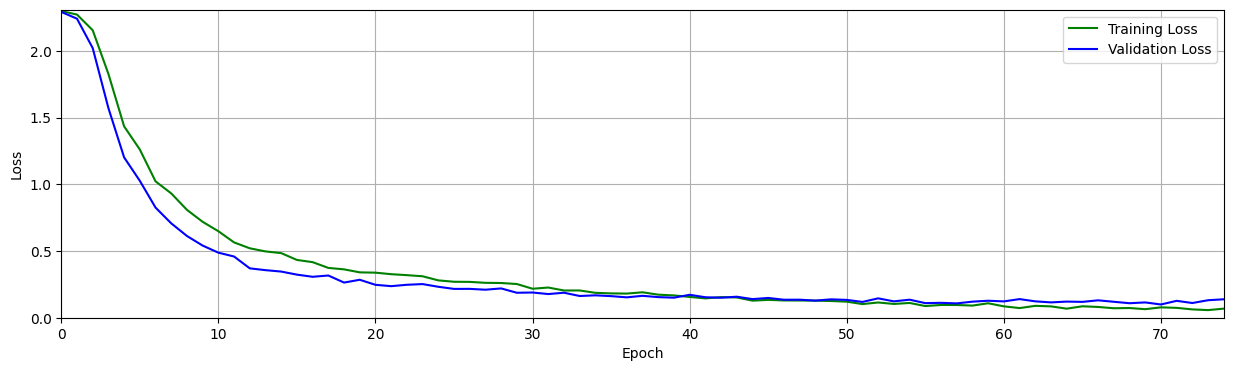

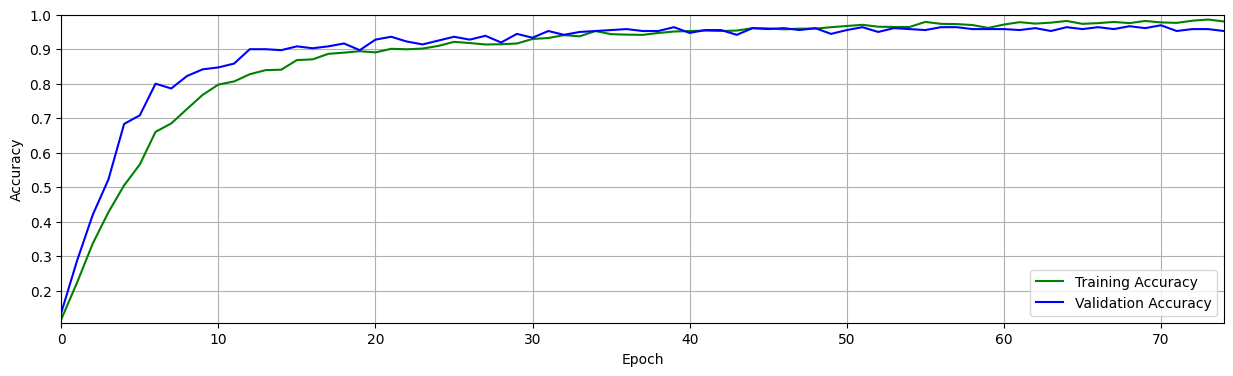

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report:

Additional Metrics:
MCC: 0.9481



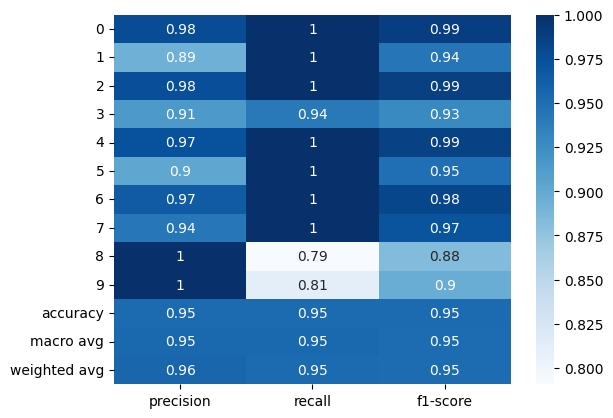

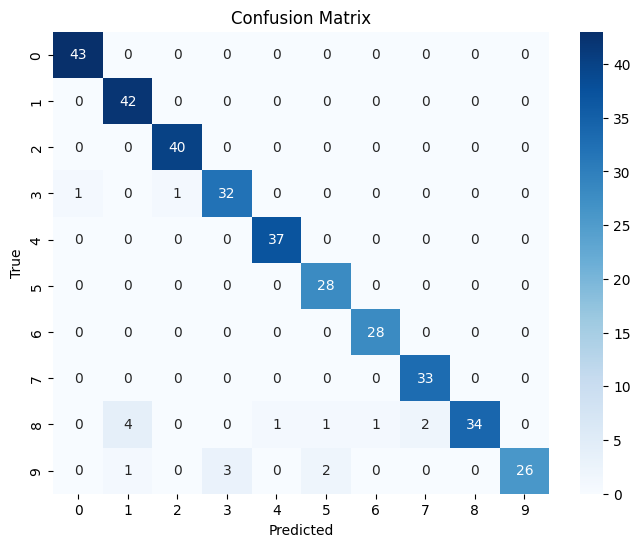

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(8,8,1)))
model_1.add(MaxPool2D((2,2), padding='same'))

model_1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_1.add(MaxPool2D((2,2), padding='same'))

model_1.add(Flatten())

model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))

model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))

model_1.add(Dense(10, activation='softmax'))

model_1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

learn(model_1, X, y, 75, 1, 64)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.1315 - loss: 2.3014 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1417 - val_loss: 2.2992 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1878 - loss: 2.2937 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1722 - val_loss: 2.2830 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2160 - loss: 2.2690 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2417 - val_loss: 2.2344 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/4
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2771 - loss: 2.2071 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2972 - val_loss: 2.1127 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2740 - loss: 2.0635 - precision: 0.1667 - recall: 2.0

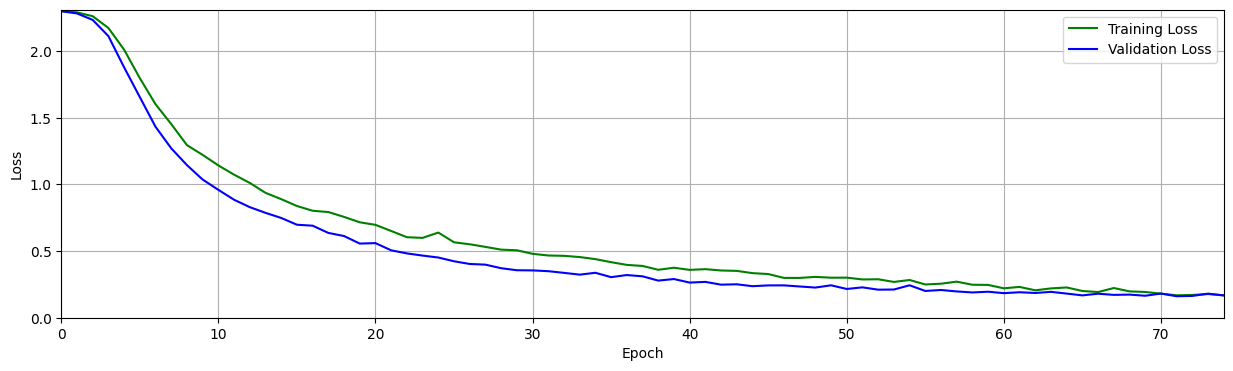

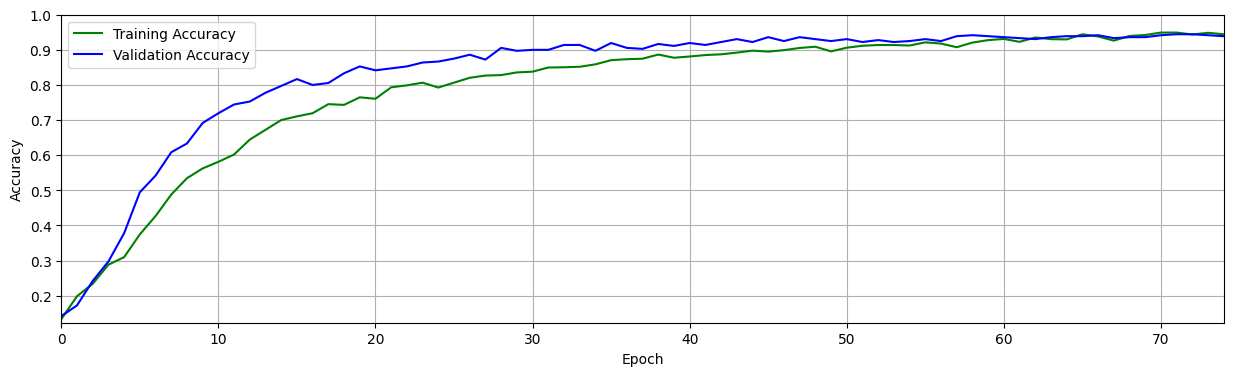

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report:

Additional Metrics:
MCC: 0.9321



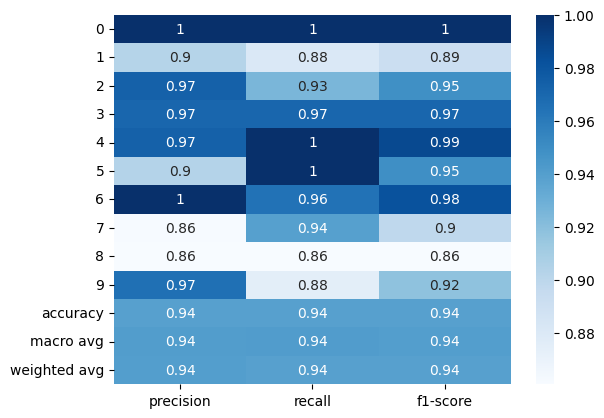

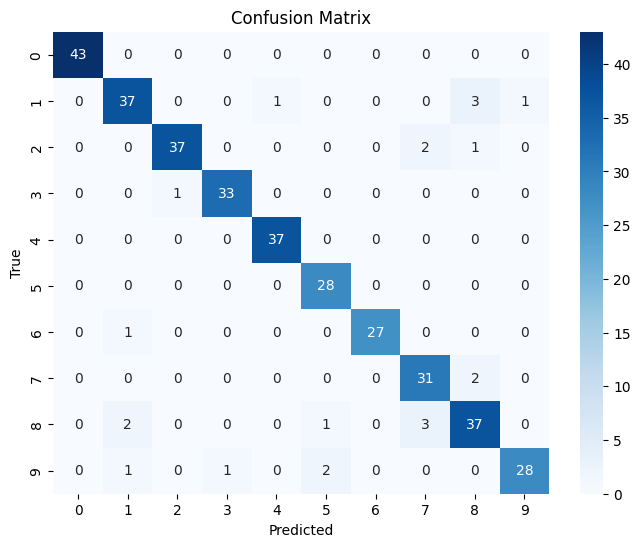

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(8,8,1)))
model_2.add(MaxPool2D((2,2), padding='same'))

model_2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model_2.add(MaxPool2D((2,2), padding='same'))

model_2.add(Flatten())

model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))

model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.2))

model_2.add(Dense(10, activation='softmax'))

model_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

learn(model_2, X, y, 75, 1, 64)

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.1216 - loss: 2.3013 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1028 - val_loss: 2.2940 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2060 - loss: 2.2836 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2306 - val_loss: 2.2350 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2343 - loss: 2.1863 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2806 - val_loss: 1.9863 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/4
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3186 - loss: 1.8907 - precision: 0.2422 - recall: 0.0031 - val_accuracy: 0.4000 - val_loss: 1.6020 - val_precision: 0.8182 - val_recall: 0.0250
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4347 - loss: 1.5650 - precision: 0.6778 - recall: 0.0505 - val_acc

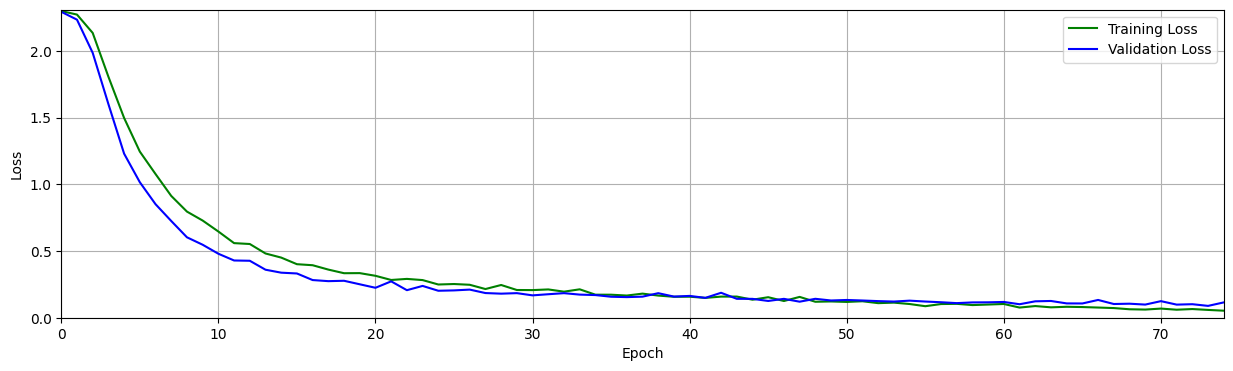

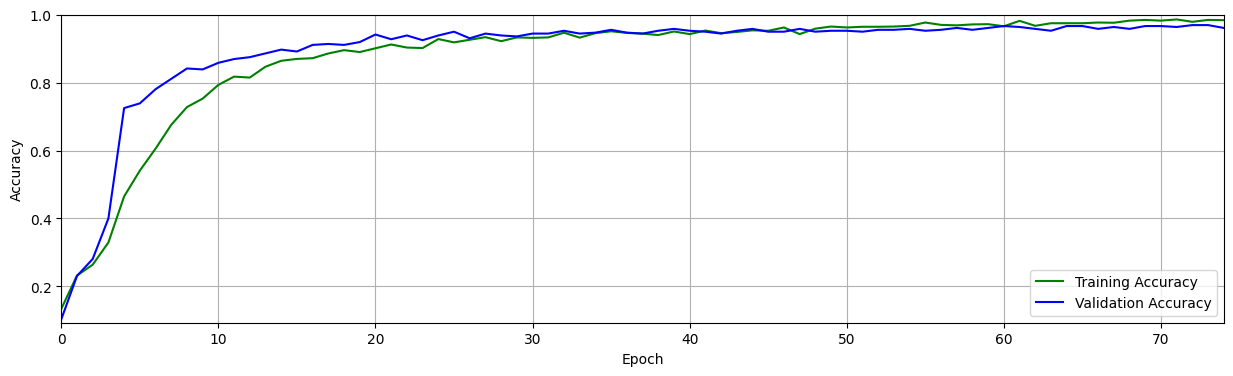

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report:

Additional Metrics:
MCC: 0.9569



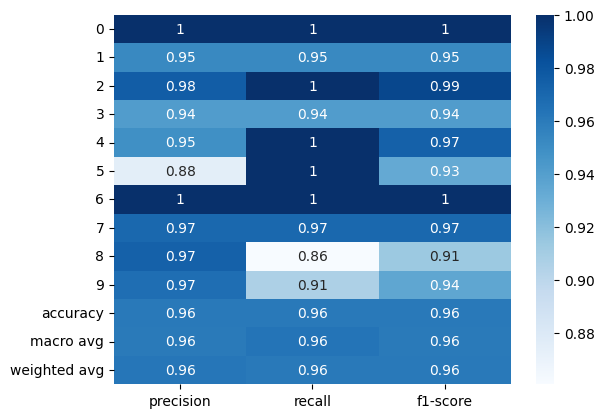

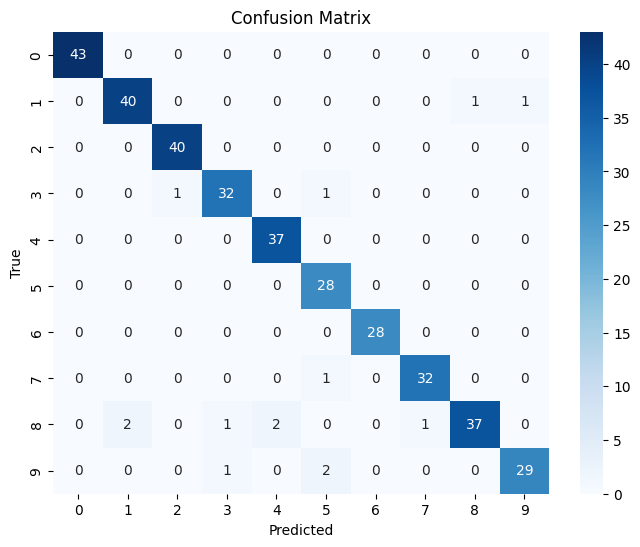

In [ ]:
model_3 = Sequential()
initializer = GlorotNormal()

model_3.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model_3.add(MaxPool2D((2,2), padding='same'))

model_3.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer=initializer))
model_3.add(MaxPool2D((2,2), padding='same'))

model_3.add(Flatten())

model_3.add(Dense(128, activation='relu', kernel_initializer=initializer))
model_3.add(Dropout(0.2))

model_3.add(Dense(64, activation='relu', kernel_initializer=initializer))
model_3.add(Dropout(0.2))

model_3.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model_3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

learn(model_3, X, y, 75, 1, 64)

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2558 - loss: 2.2947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4611 - val_loss: 2.2458 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4755 - loss: 2.1850 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5250 - val_loss: 1.8774 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6550 - loss: 1.6557 - precision: 0.5185 - recall: 0.0154 - val_accuracy: 0.7306 - val_loss: 1.1044 - val_precision: 0.9894 - val_recall: 0.2583
Epoch 4/4
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7706 - loss: 0.9912 - precision: 0.9680 - recall: 0.3534 - val_accuracy: 0.7639 - val_loss: 0.8118 - val_precision: 0.9306 - val_recall: 0.5583
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8065 - loss: 0.7377 - precision: 0.9210 - recall: 0.6273 - val_accuracy: 0.7944 - val_

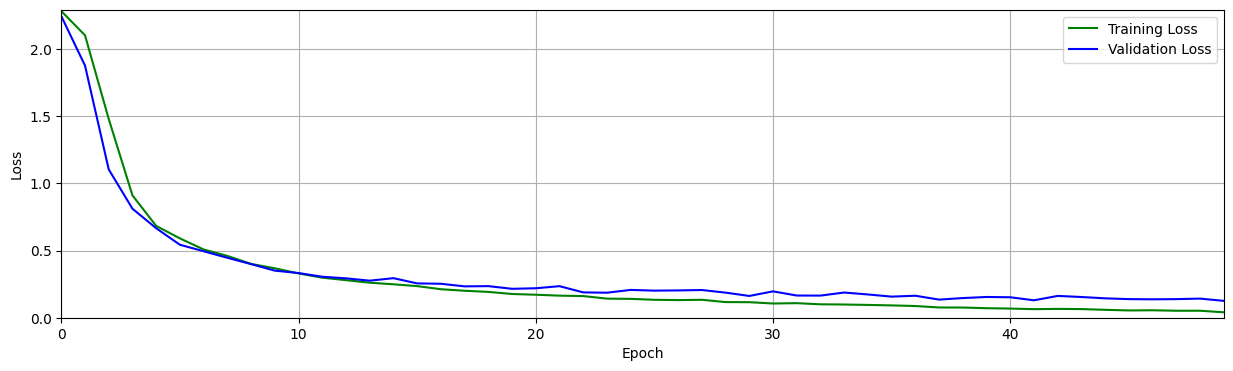

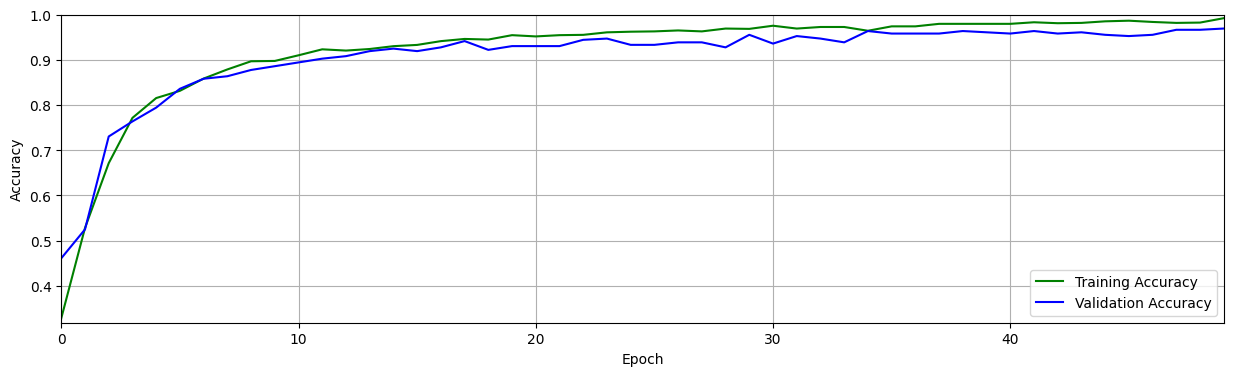

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report:

Additional Metrics:
MCC: 0.9661



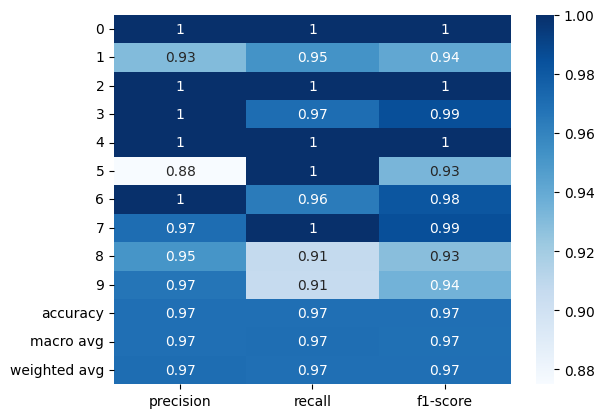

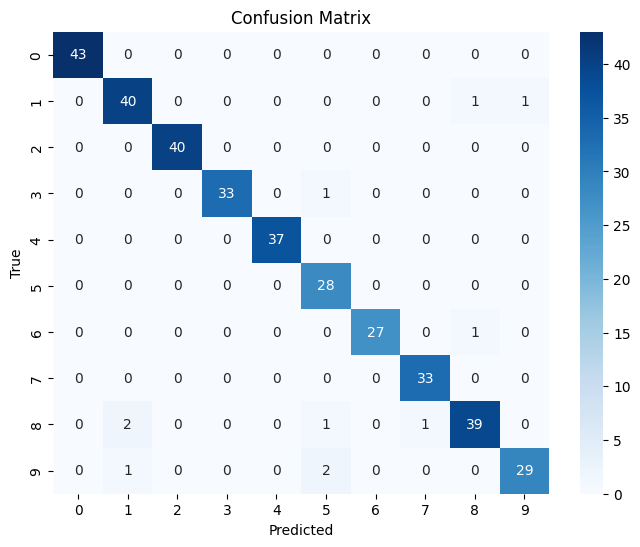

In [ ]:
model_4 = Sequential()
initializer = GlorotNormal()

model_4.add(Conv2D(32, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model_4.add(MaxPooling2D((2,2), padding='same'))

model_4.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=initializer))
model_4.add(MaxPooling2D((2,2), padding='same'))

model_4.add(Flatten())

model_4.add(Dense(128, activation='relu', kernel_initializer=initializer))

model_4.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

learn(model_4, X, y, 50, 1, 32)

45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.1349 - loss: 2.2980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2750 - val_loss: 2.2640 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3961 - loss: 2.2047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5639 - val_loss: 1.9343 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5072 - loss: 1.7752 - precision: 0.4666 - recall: 0.0127 - val_accuracy: 0.6333 - val_loss: 1.3808 - val_precision: 1.0000 - val_recall: 0.0556
Epoch 4/4
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6903 - loss: 1.2298 - precision: 0.9702 - recall: 0.1401 - val_accuracy: 0.7611 - val_loss: 1.0291 - val_precision: 0.9667 - val_recall: 0.3222
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7288 - loss: 0.9366 - precision: 0.9444 - recall: 0.4046 - val_accuracy: 0.7667 - val_

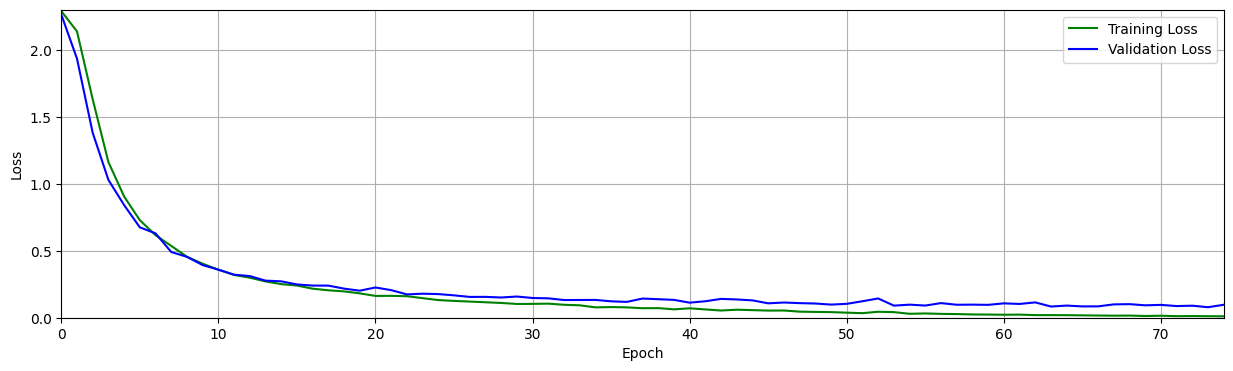

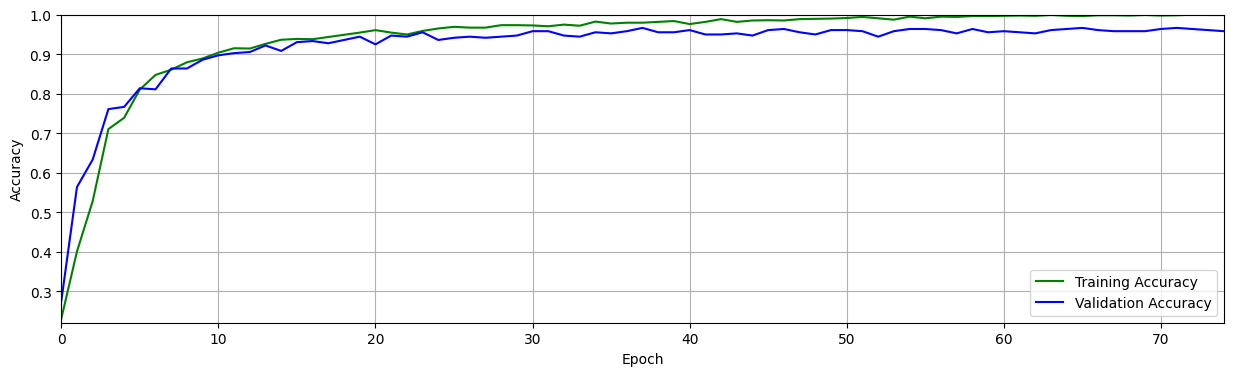

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report:

Additional Metrics:
MCC: 0.9540



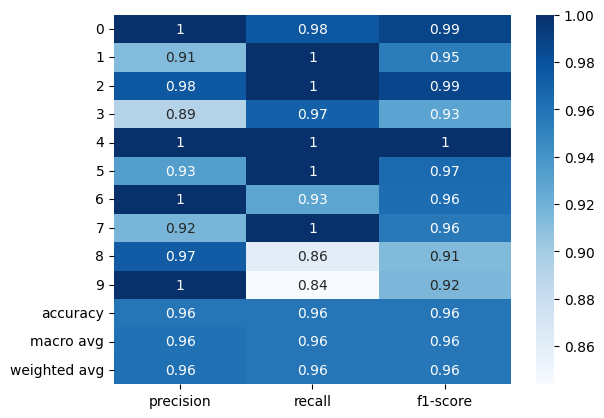

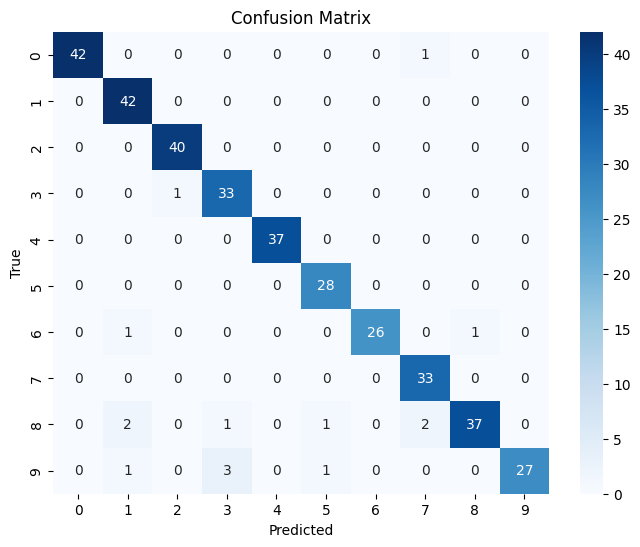

In [ ]:
model_5 = Sequential()
initializer = GlorotNormal()

model_5.add(Conv2D(32, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model_5.add(MaxPooling2D((2,2), padding='same'))

model_5.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=initializer))
model_5.add(MaxPooling2D((2,2), padding='same'))

model_5.add(Flatten())

model_5.add(Dense(128, activation='relu', kernel_initializer=initializer))

model_5.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model_5.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

learn(model_5, X, y, 75, 1, 32)

45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.1820 - loss: 2.2988 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4444 - val_loss: 2.2791 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4905 - loss: 2.2522 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3972 - val_loss: 2.1268 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4982 - loss: 2.0084 - precision: 0.0435 - recall: 3.0256e-05 - val_accuracy: 0.5167 - val_loss: 1.6659 - val_precision: 1.0000 - val_recall: 0.0111
Epoch 4/4
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6293 - loss: 1.4947 - precision: 0.9001 - recall: 0.0557 - val_accuracy: 0.7333 - val_loss: 1.1583 - val_precision: 1.0000 - val_recall: 0.1750
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7397 - loss: 1.0646 - precision: 0.9563 - recall: 0.2736 - val_accuracy: 0.7472 -

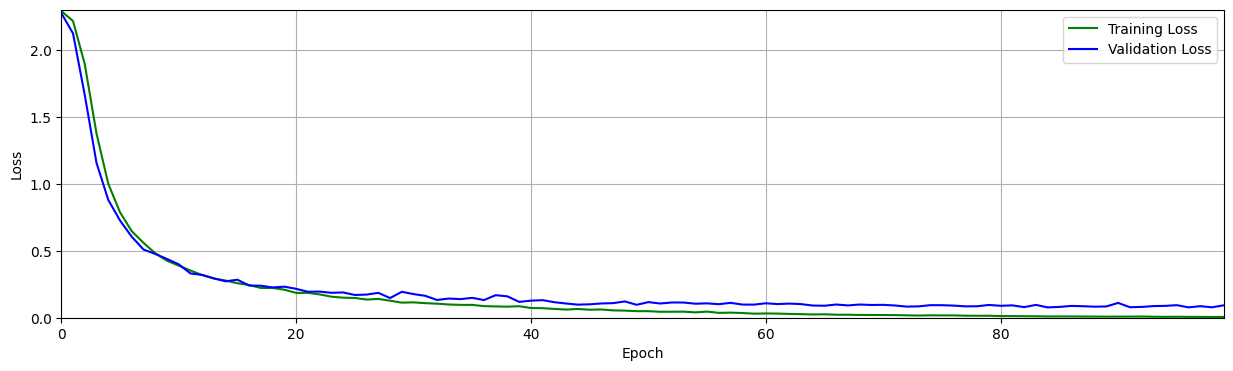

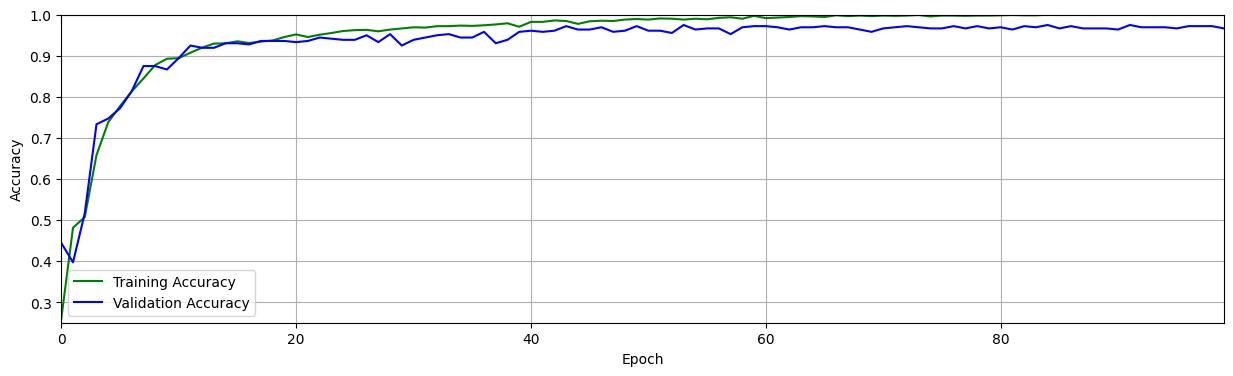

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report:

Additional Metrics:
MCC: 0.9631



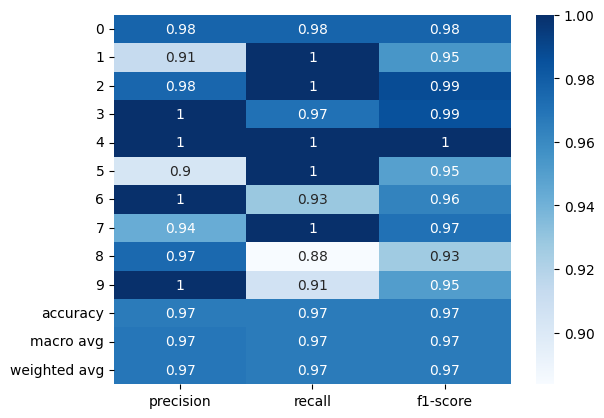

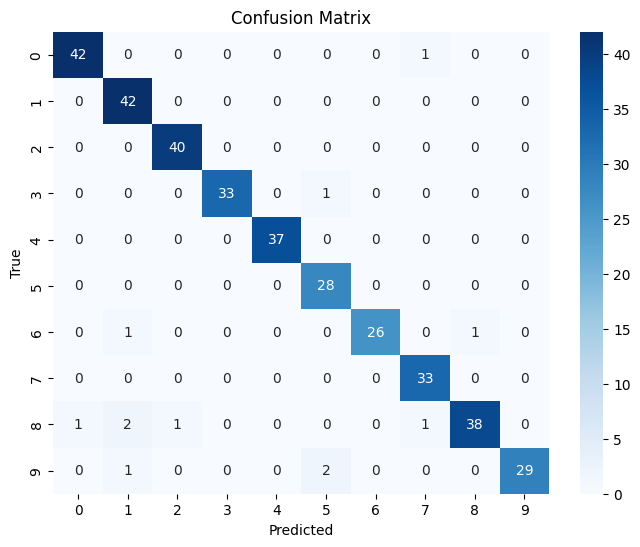

In [ ]:
model_6 = Sequential()
initializer = GlorotNormal()

model_6.add(Conv2D(24, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model_6.add(MaxPooling2D((2,2), padding='same'))

model_6.add(Conv2D(48, (3,3), activation='relu', kernel_initializer=initializer))
model_6.add(MaxPooling2D((2,2), padding='same'))

model_6.add(Flatten())

model_6.add(Dense(96, activation='relu', kernel_initializer=initializer))

model_6.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model_6.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

learn(model_6, X, y, 100, 1, 32)

45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.1297 - loss: 2.3010 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1972 - val_loss: 2.2928 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2683 - loss: 2.2822 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3889 - val_loss: 2.2386 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4435 - loss: 2.1888 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4611 - val_loss: 2.0114 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/4
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4806 - loss: 1.8825 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5861 - val_loss: 1.5601 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6245 - loss: 1.4331 - precision: 0.8015 - recall: 0.0

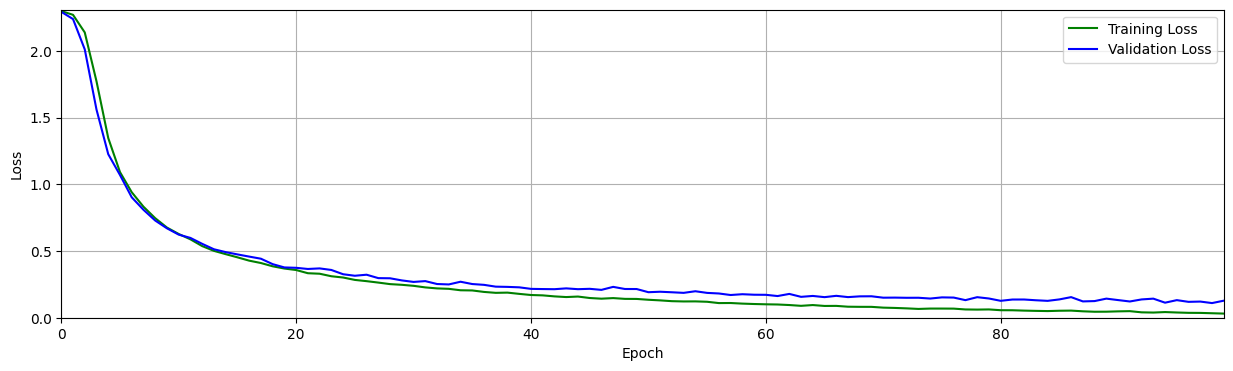

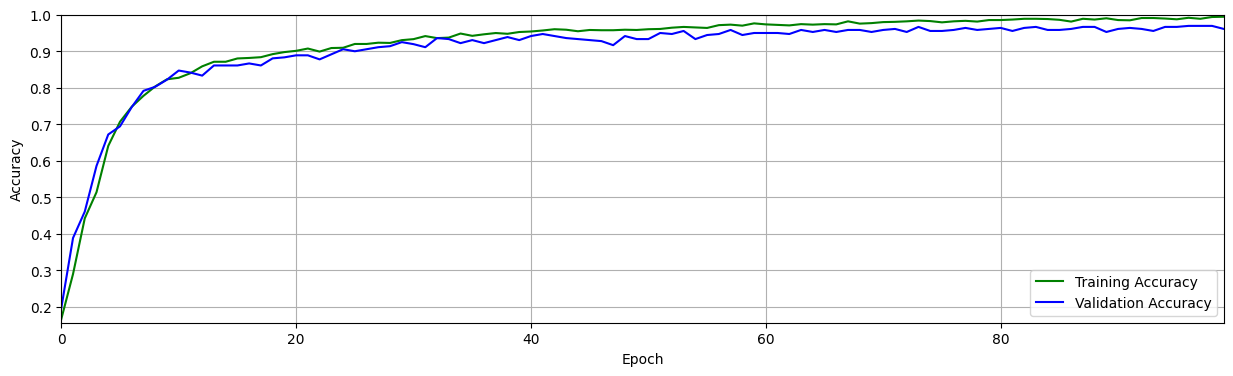

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report:

Additional Metrics:
MCC: 0.9571



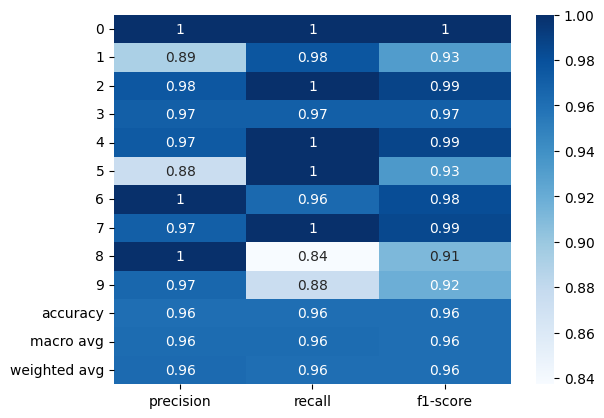

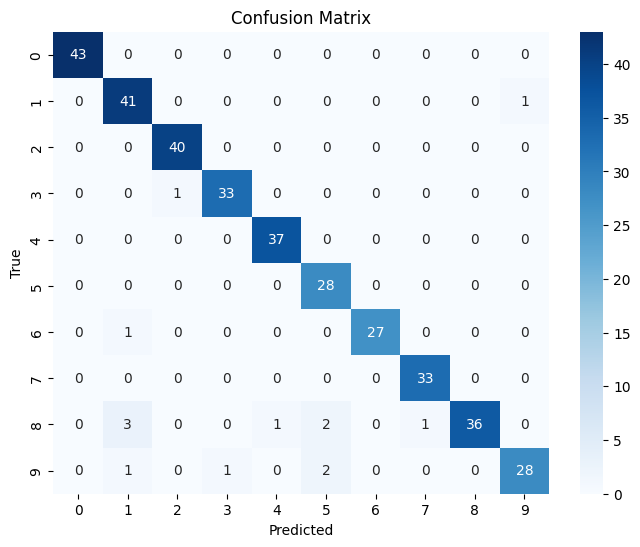

In [ ]:
model_7 = Sequential()
initializer = GlorotNormal()

model_7.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model_7.add(MaxPooling2D((2,2), padding='same'))

model_7.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initializer))
model_7.add(MaxPooling2D((2,2), padding='same'))

model_7.add(Flatten())

model_7.add(Dense(64, activation='relu', kernel_initializer=initializer))

model_7.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model_7.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

learn(model_7, X, y, 100, 1, 32)

90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1252 - loss: 2.2989 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1722 - val_loss: 2.2694 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2061 - loss: 2.2108 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1833 - val_loss: 1.9296 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3082 - loss: 1.7725 - precision: 0.2574 - recall: 0.0023 - val_accuracy: 0.5639 - val_loss: 1.5079 - val_precision: 0.5000 - val_recall: 0.0278
Epoch 4/4
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5682 - loss: 1.4219 - precision: 0.7333 - recall: 0.0583 - val_accuracy: 0.6722 - val_loss: 1.2032 - val_precision: 0.7805 - val_recall: 0.0889
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6780 - loss: 1.1433 - precision: 0.9159 - recall: 0.2018 - val_accuracy: 0.7583 - val_l

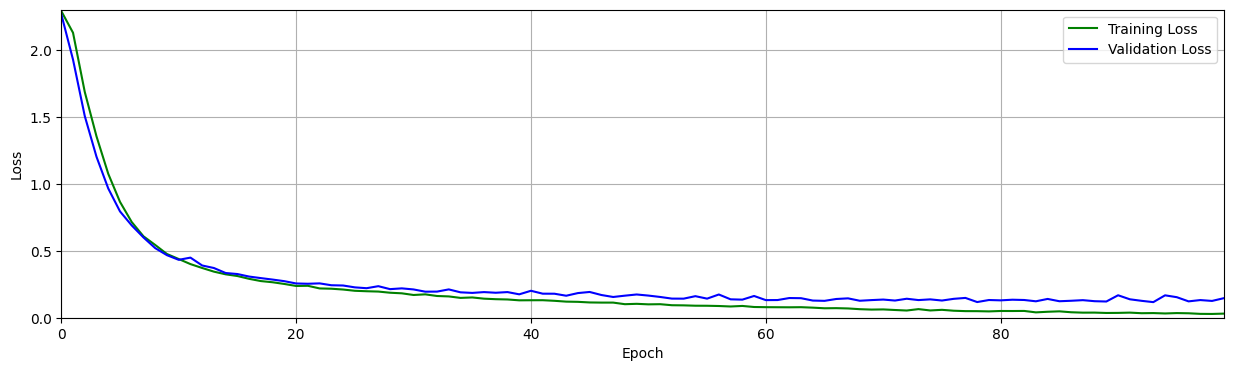

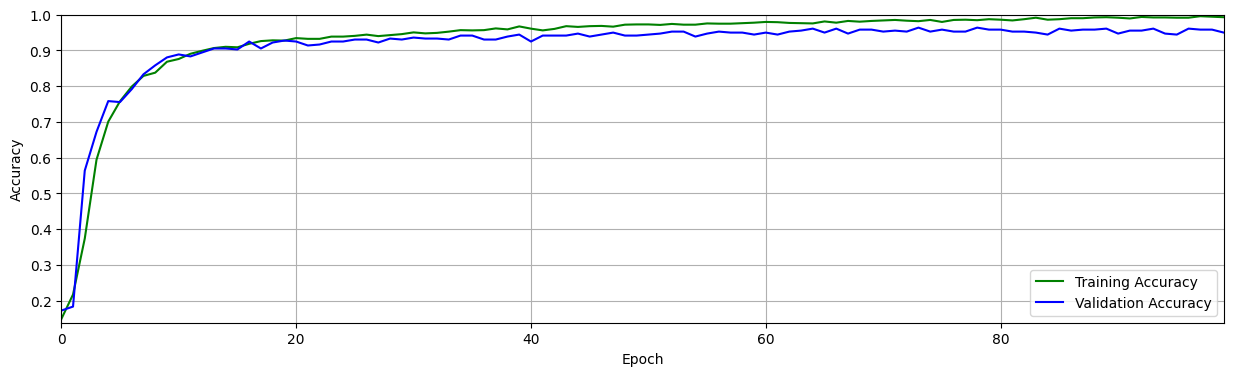

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report:

Additional Metrics:
MCC: 0.9448



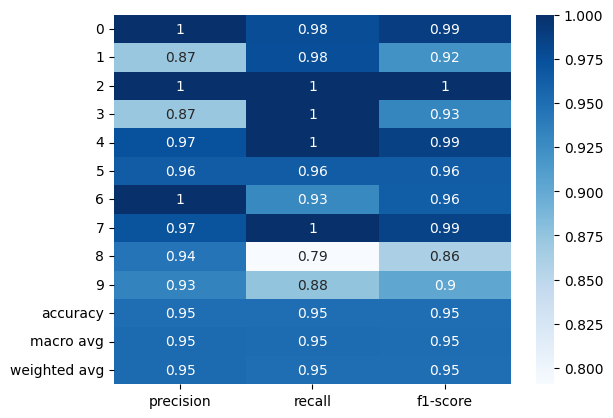

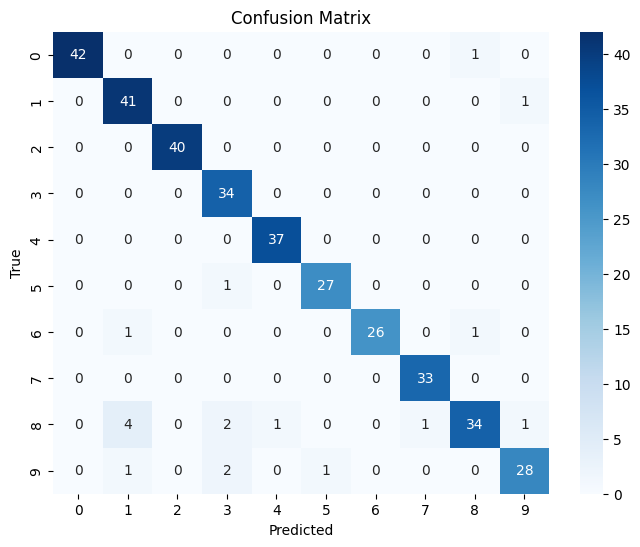

In [ ]:
model_7 = Sequential()
initializer = GlorotNormal()

model_7.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model_7.add(MaxPooling2D((2,2), padding='same'))

model_7.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initializer))
model_7.add(MaxPooling2D((2,2), padding='same'))

model_7.add(Flatten())

model_7.add(Dense(64, activation='relu', kernel_initializer=initializer))

model_7.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model_7.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

learn(model_7, X, y, 100, 1, 16)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.1308 - loss: 2.2993 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1500 - val_loss: 2.2933 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2190 - loss: 2.2851 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1417 - val_loss: 2.2753 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2415 - loss: 2.2566 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2306 - val_loss: 2.2268 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/4
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3354 - loss: 2.1915 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2833 - val_loss: 2.1248 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4007 - loss: 2.0578 - precision: 0.0000e+00 - recal

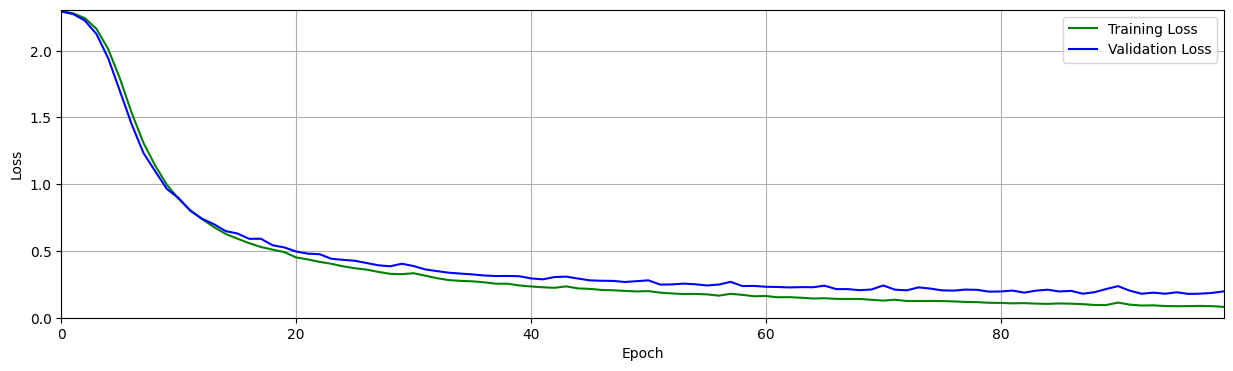

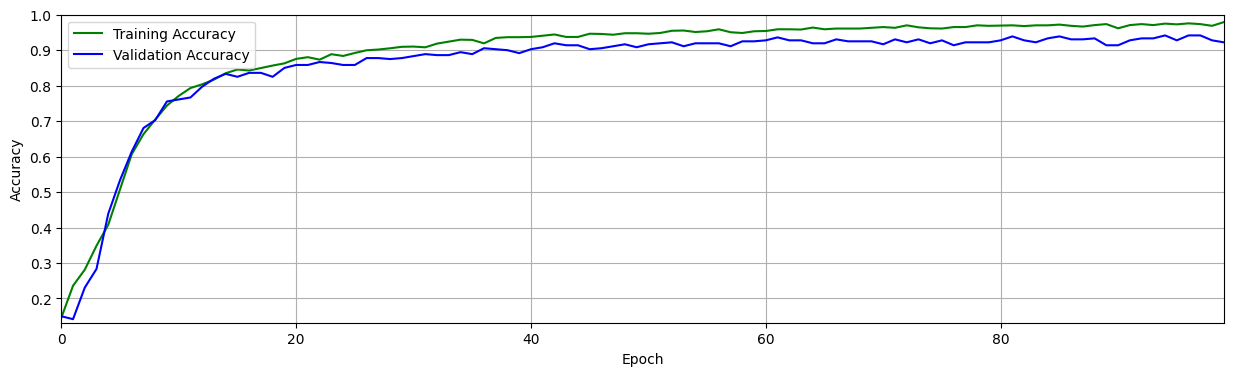

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Classification Report:

Additional Metrics:
MCC: 0.9137



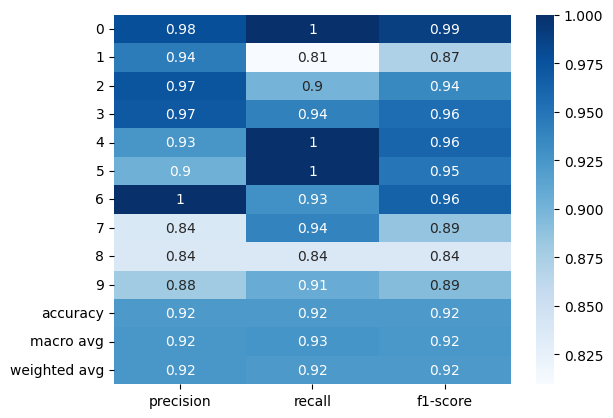

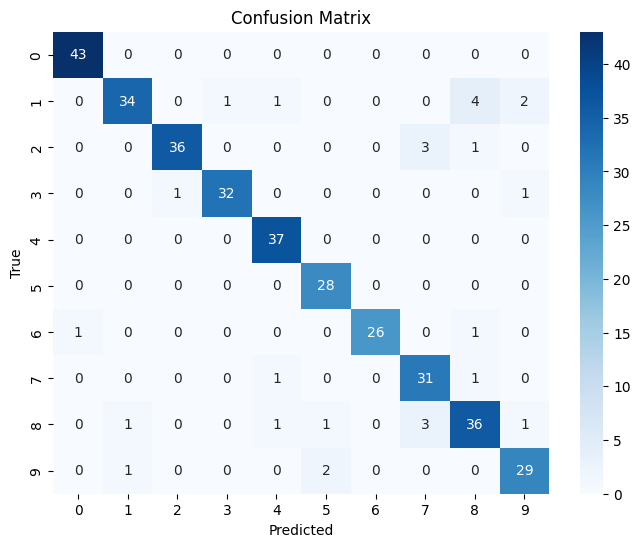

In [ ]:
model_8 = Sequential()
initializer = GlorotNormal()

model_8.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model_8.add(MaxPooling2D((2,2), padding='same'))

model_8.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initializer))
model_8.add(MaxPooling2D((2,2), padding='same'))

model_8.add(Flatten())

model_8.add(Dense(64, activation='relu', kernel_initializer=initializer))

model_8.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model_8.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

learn(model_8, X, y, 100, 1, 64)

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1892 - loss: 2.2983 - val_accuracy: 0.3583 - val_loss: 2.2832
Epoch 2/2
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3760 - loss: 2.2669 - val_accuracy: 0.4833 - val_loss: 2.2001
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4723 - loss: 2.1307 - val_accuracy: 0.5944 - val_loss: 1.9121
Epoch 4/4
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5939 - loss: 1.7828 - val_accuracy: 0.7083 - val_loss: 1.4449
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7709 - loss: 1.2840 - val_accuracy: 0.7694 - val_loss: 1.0675
Epoch 6/6
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7739 - loss: 0.9815 - val_accuracy: 0.7667 - val_loss: 0.8826
Epoch 7/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8325 - loss: 0.7846 - val_accuracy: 0.8250 - val_loss: 0.7408
Epoch 8/8
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8422 - loss: 0.6653 - val_accuracy: 0.8472 - val_loss: 0.6403
Epoch 9/9

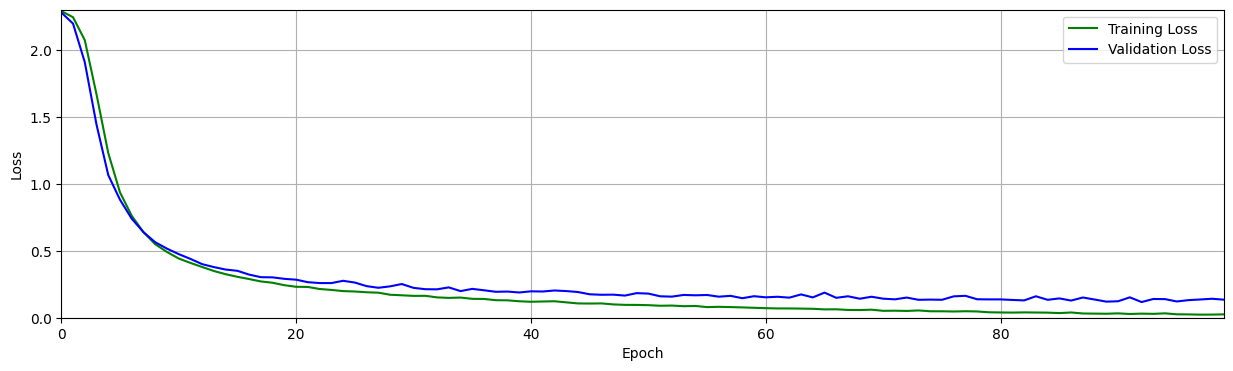

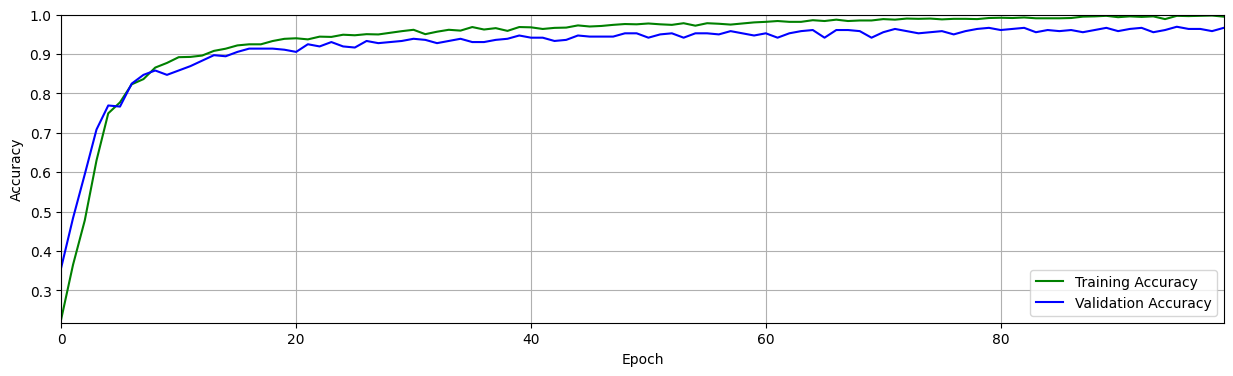

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report:

Additional Metrics:
MCC: 0.9630



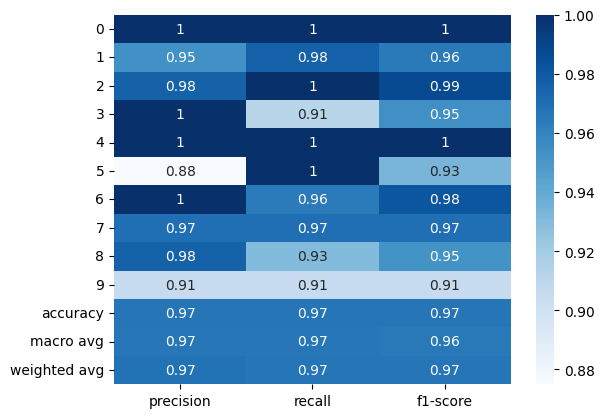

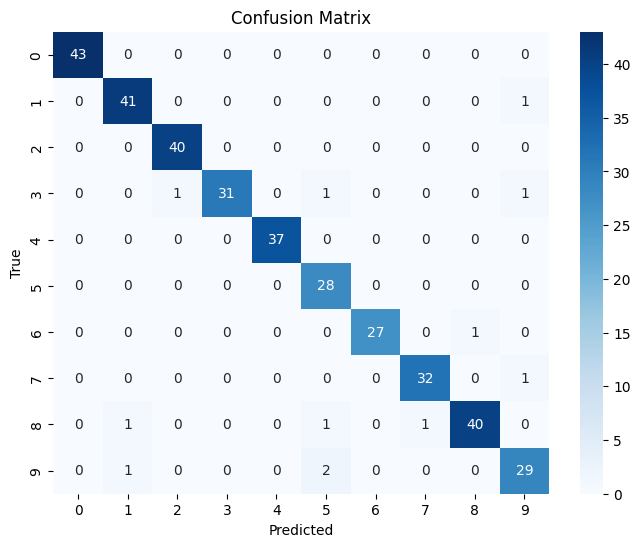

In [ ]:
model_8 = Sequential()
initializer = GlorotNormal()

model_8.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model_8.add(MaxPooling2D((2,2), padding='same'))

model_8.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initializer))
model_8.add(MaxPooling2D((2,2), padding='same'))

model_8.add(Flatten())

model_8.add(Dense(64, activation='relu', kernel_initializer=initializer))

model_8.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model_8.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

learn(model_8, X, y, 100, 1, 32)

In [ ]:
def learn(model, X, y, max_epochs, epochs_per_iter, batch_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

    train_loss = []
    train_acc  = []
    valid_loss = []
    valid_acc  = []

    epoch = 0
    while epoch < max_epochs:
        training_results = model.fit(X_train, y_train, batch_size=batch_size, initial_epoch=epoch, epochs=epoch+epochs_per_iter, verbose=1, validation_split=0.3)

        if math.isnan(training_results.history["loss"][-1]):
            break

        train_loss.extend(training_results.history["loss"])
        train_acc.extend(training_results.history["accuracy"])
        valid_loss.extend(training_results.history["val_loss"])
        valid_acc.extend(training_results.history["val_accuracy"])

        epoch += epochs_per_iter

    plot_results([ train_loss, valid_loss ],
                ylabel="Loss",
                xlim = [0, max_epochs-1],
                ylim = [0.0, max(max(train_loss), max(valid_loss))+0.01],
                metric_name=["Training Loss", "Validation Loss"],
                color=["g", "b"])

    plot_results([ train_acc, valid_acc ],
                ylabel="Accuracy",
                xlim = [0, max_epochs-1],
                ylim = [min(min(train_acc), min(valid_acc))-0.01, 1.0],
                metric_name=["Training Accuracy", "Validation Accuracy"],
                color=["g", "b"])

    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    clf_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='Blues')
    print("\nAdditional Metrics:")
    mcc = matthews_corrcoef(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    print(f"MCC: {mcc:.4f}\n")

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1176 - loss: 2.3002 - val_accuracy: 0.3079 - val_loss: 2.2906
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2797 - loss: 2.2843 - val_accuracy: 0.4190 - val_loss: 2.2551
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4359 - loss: 2.2404 - val_accuracy: 0.4329 - val_loss: 2.1498
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4343 - loss: 2.1081 - val_accuracy: 0.4375 - val_loss: 1.9025
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4666 - loss: 1.8341 - val_accuracy: 0.5718 - val_loss: 1.6053
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6148 - loss: 1.5451 - val_accuracy: 0.6296 - val_loss: 1.3514
Epoch 7/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6576 - loss: 1.3034 - val_accuracy: 0.6736 - val_loss: 1.1757
Epoch 8/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7368 - loss: 1.1472 - val_accuracy: 0.7037 - val_loss: 1.0291
Epoch 9

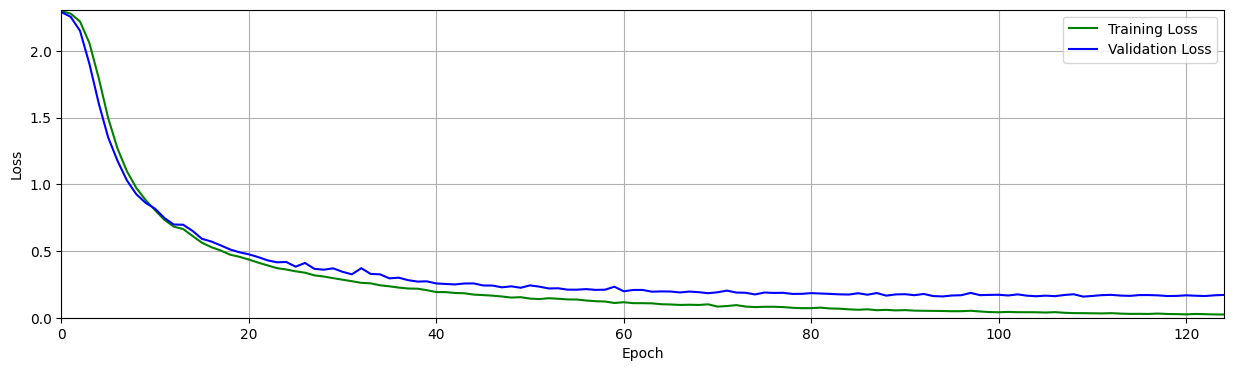

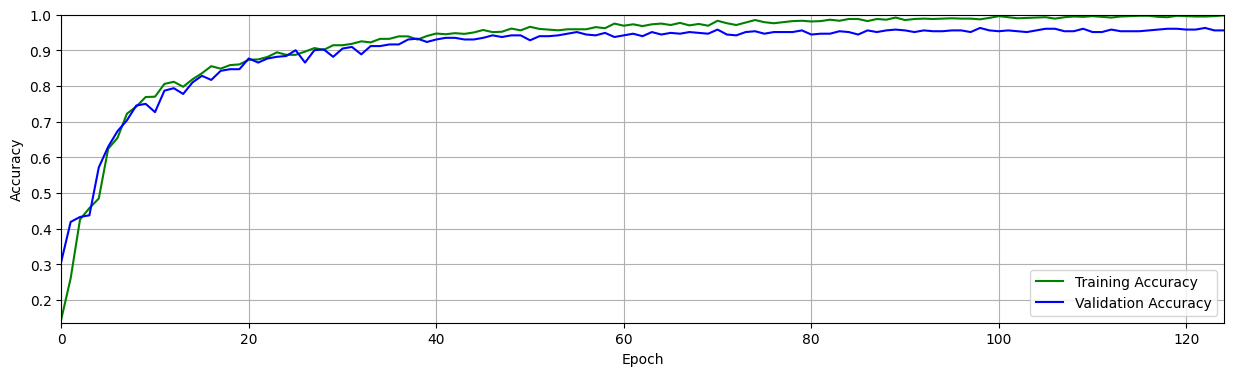

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report:

Additional Metrics:
MCC: 0.9660



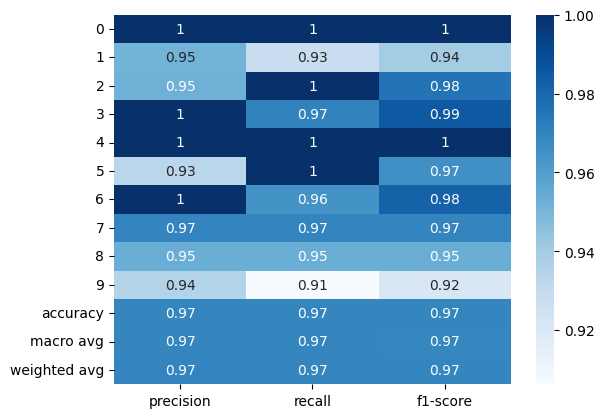

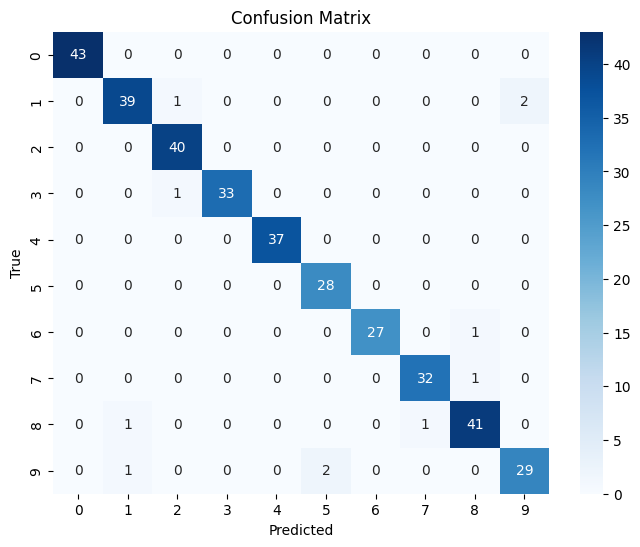

In [ ]:
model = Sequential()
initializer = GlorotNormal()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initializer))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_initializer=initializer))

model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

learn(model, X, y, 125, 1, 32)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1407 - loss: 2.3011 - precision: 0.0000e+00 - val_accuracy: 0.2801 - val_loss: 2.2929 - val_precision: 0.0000e+00
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2125 - loss: 2.2869 - precision: 0.0000e+00 - val_accuracy: 0.4097 - val_loss: 2.2632 - val_precision: 0.0000e+00
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4328 - loss: 2.2426 - precision: 0.0000e+00 - val_accuracy: 0.4398 - val_loss: 2.1731 - val_precision: 0.0000e+00
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4778 - loss: 2.1334 - precision: 0.0000e+00 - val_accuracy: 0.5093 - val_loss: 1.9703 - val_precision: 0.0000e+00
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5728 - loss: 1.8716 - precision: 0.0000e+00 - val_accuracy: 0.5903 - val_loss: 1.6408 - val_precision: 0.0000e+00
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6668 - loss: 1.5541 - precision: 0.2424 - val_accuracy: 0.618

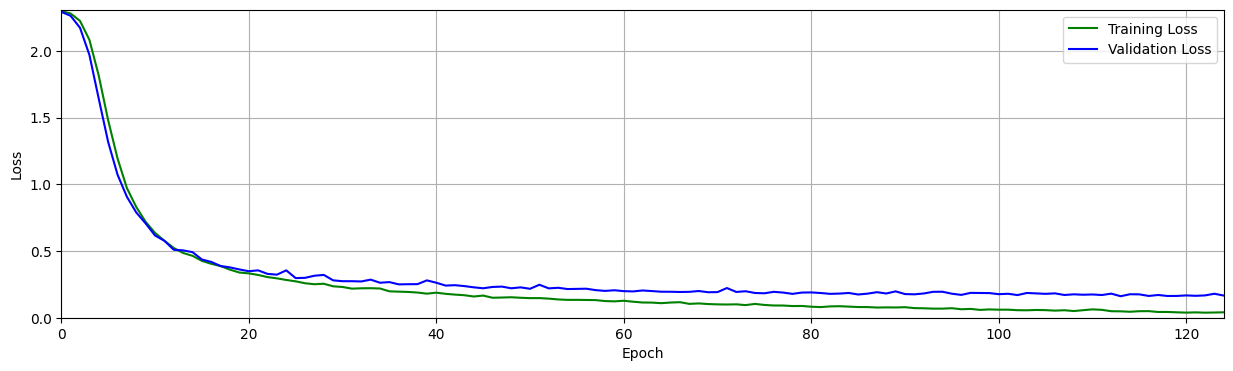

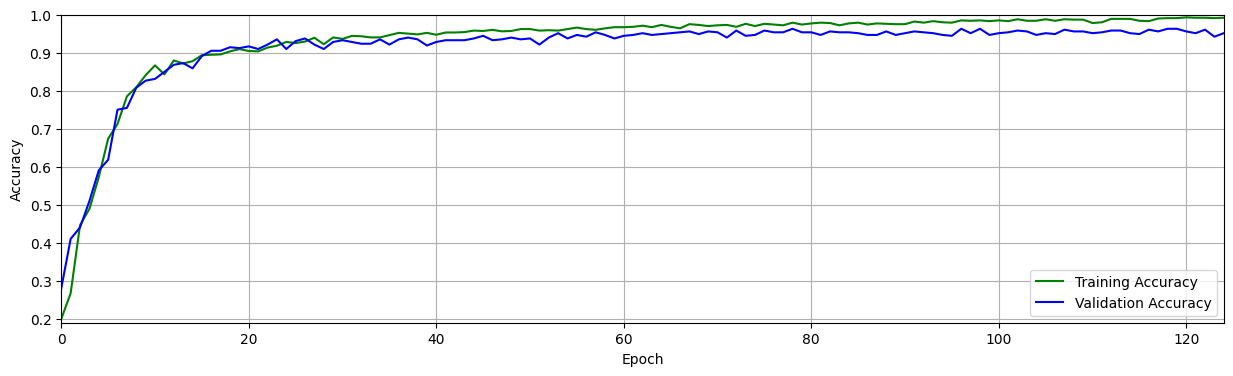

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report:

Additional Metrics:
MCC: 0.9661



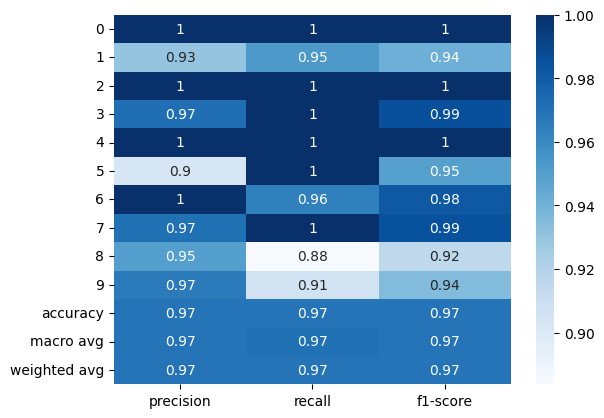

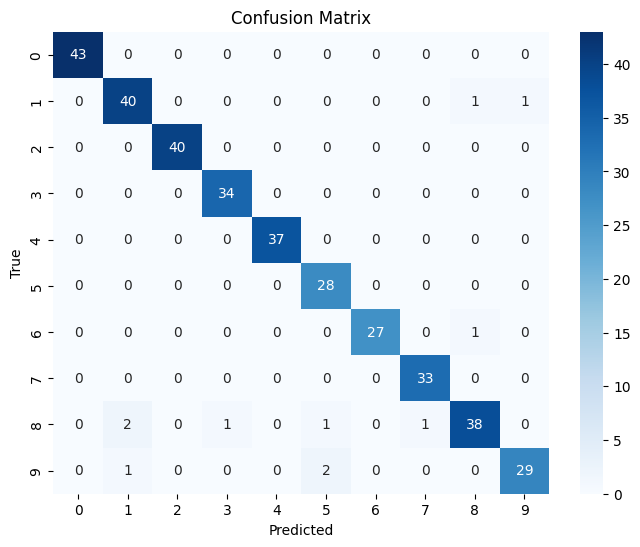

In [ ]:
model = Sequential()
initializer = GlorotNormal()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initializer))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_initializer=initializer))

model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision'],
)

learn(model, X, y, 125, 1, 32)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1616 - loss: 2.3012 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1968 - val_loss: 2.2962 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2786 - loss: 2.2898 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1806 - val_loss: 2.2771 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2591 - loss: 2.2591 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2801 - val_loss: 2.2206 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3052 - loss: 2.1821 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3356 - val_loss: 2.0873 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3698 - loss: 2.0044 - precision: 0.0000e+00 - recall: 

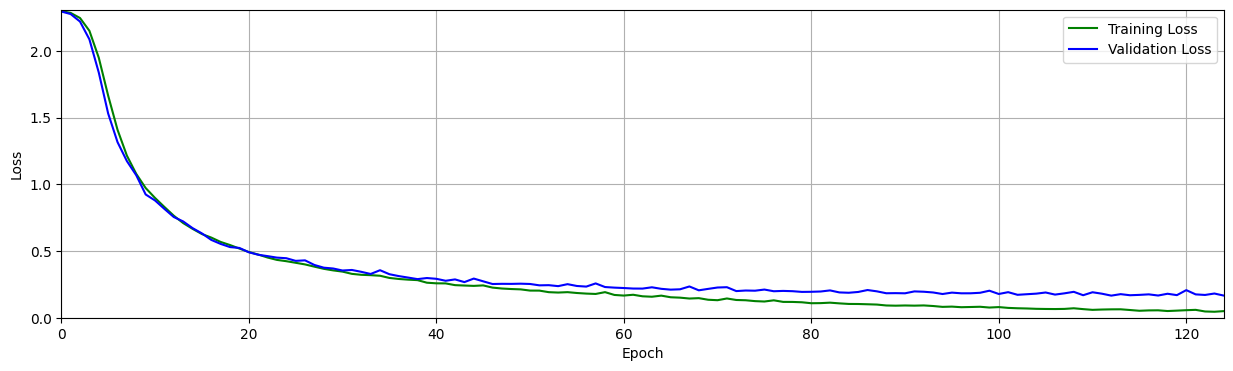

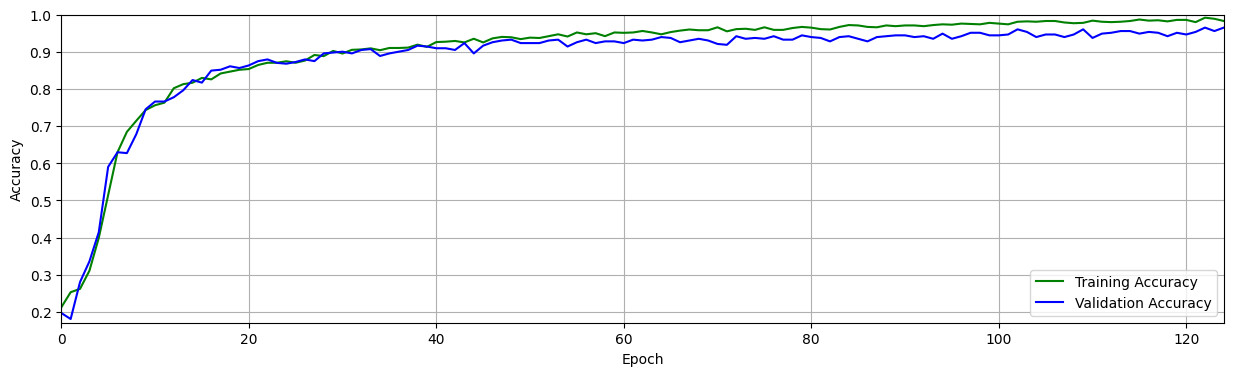

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Classification Report:

Additional Metrics:
MCC: 0.9537



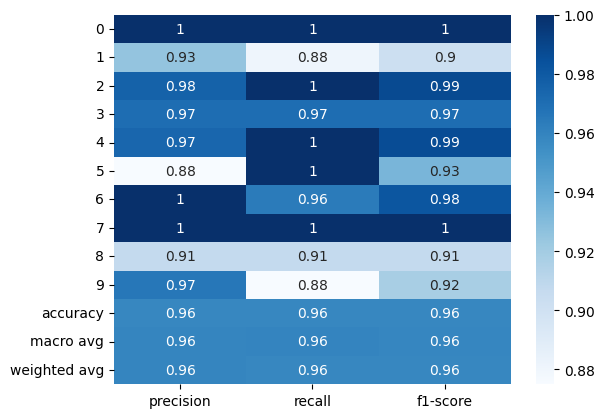

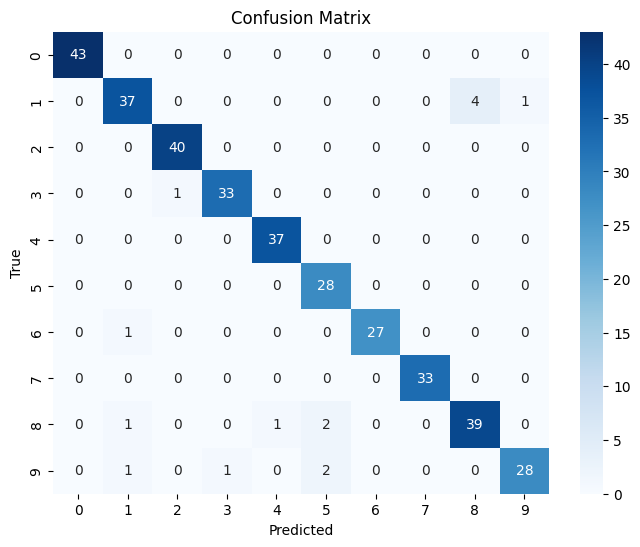

In [ ]:
model = Sequential()
initializer = GlorotNormal()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initializer))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_initializer=initializer))

model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

learn(model, X, y, 125, 1, 32)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1569 - loss: 4.6390 - val_accuracy: 0.1690 - val_loss: 2.3012
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1798 - loss: 4.9230 - val_accuracy: 0.1667 - val_loss: 2.2875
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1975 - loss: 4.4735 - val_accuracy: 0.1736 - val_loss: 2.2478
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1900 - loss: 5.3692 - val_accuracy: 0.2014 - val_loss: 2.1494
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2823 - loss: 4.5912 - val_accuracy: 0.2361 - val_loss: 1.9581
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3397 - loss: 4.8685 - val_accuracy: 0.4583 - val_loss: 1.7497
Epoch 7/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4197 - loss: 4.5643 - val_accuracy: 0.5671 - val_loss: 1.5311
Epoch 8/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4915 - loss: 4.4071 - val_accuracy: 0.6968 - val_loss: 1.3437
Epoch 9/9

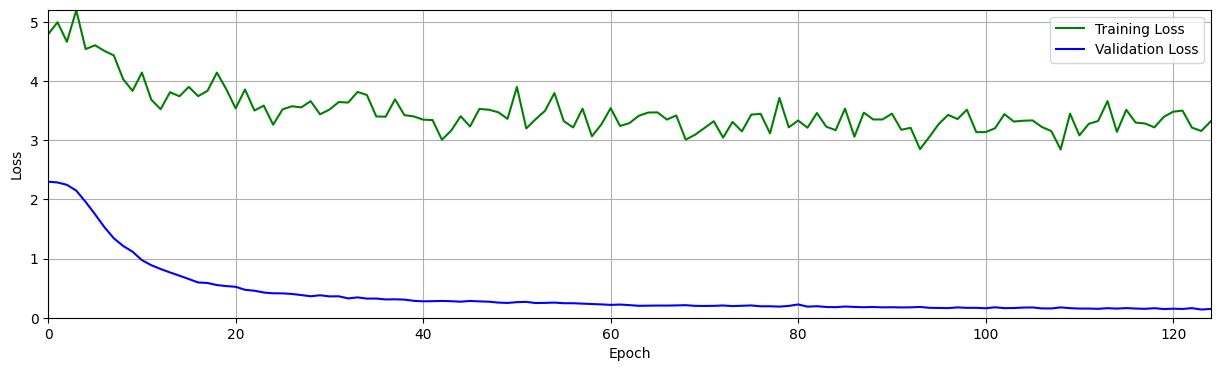

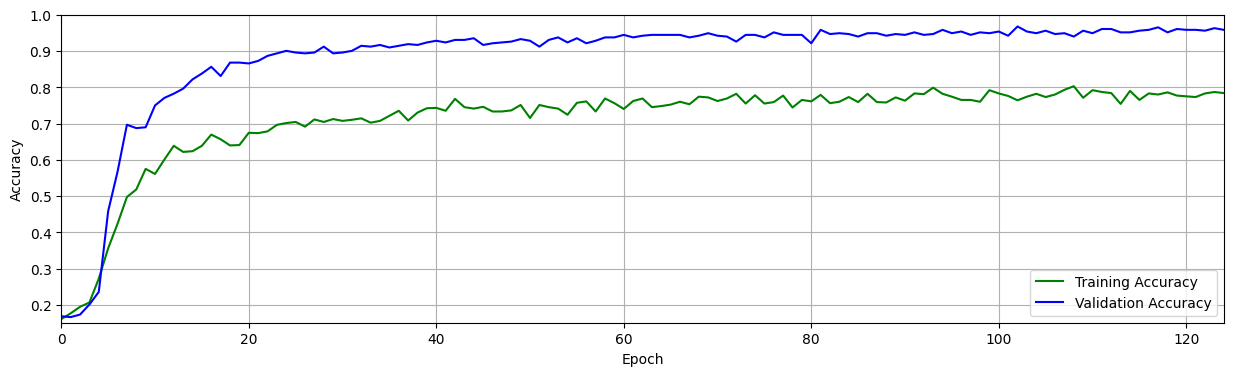

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report:

Additional Metrics:
MCC: 0.9259



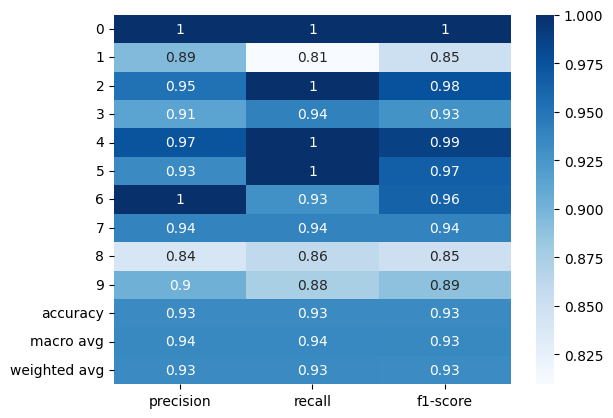

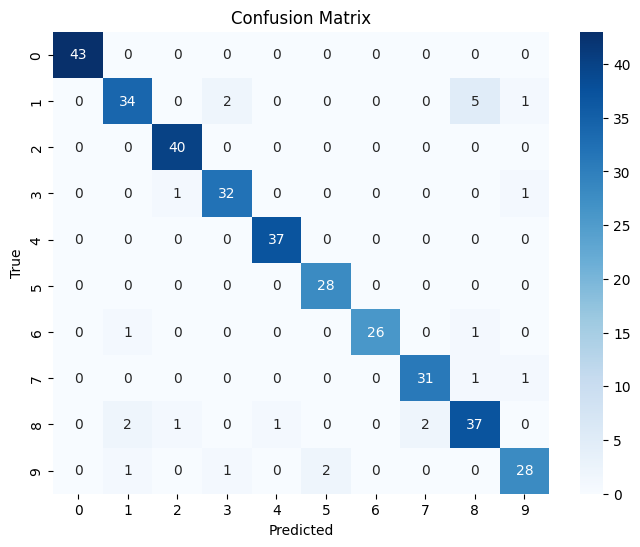

In [ ]:
model = Sequential()
initializer = GlorotNormal()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initializer))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax', kernel_initializer=initializer))
model.add(Dropout(0.2))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

learn(model, X, y, 125, 1, 32)

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1242 - loss: 4.7135 - val_accuracy: 0.1194 - val_loss: 2.2923
Epoch 2/2
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2308 - loss: 4.5427 - val_accuracy: 0.3417 - val_loss: 2.2446
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2727 - loss: 4.7596 - val_accuracy: 0.3361 - val_loss: 2.0802
Epoch 4/4
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3439 - loss: 4.5027 - val_accuracy: 0.4639 - val_loss: 1.7759
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3612 - loss: 4.8848 - val_accuracy: 0.5611 - val_loss: 1.5556
Epoch 6/6
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5044 - loss: 3.6297 - val_accuracy: 0.6528 - val_loss: 1.2894
Epoch 7/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5252 - loss: 3.8338 - val_accuracy: 0.7472 - val_loss: 1.0901
Epoch 8/8
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5749 - loss: 3.8883 - val_accuracy: 0.7667 - val_loss: 0.9334
Epoch 9/9

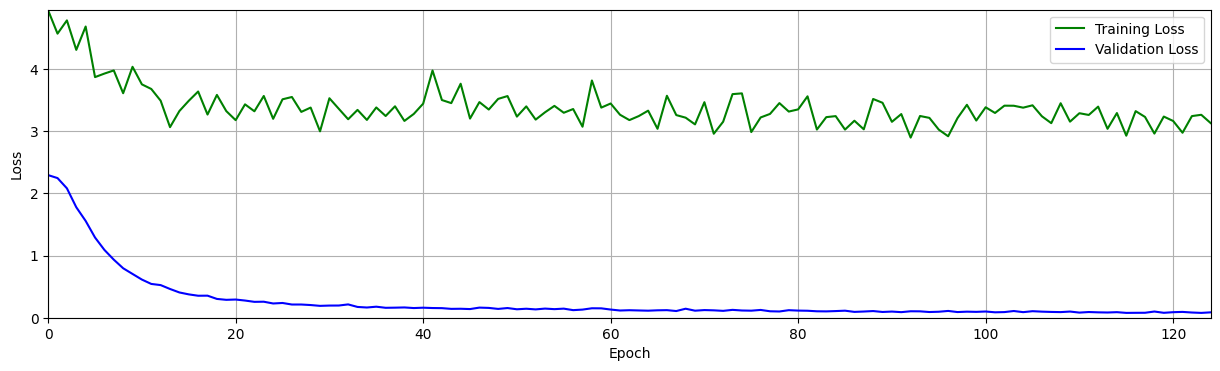

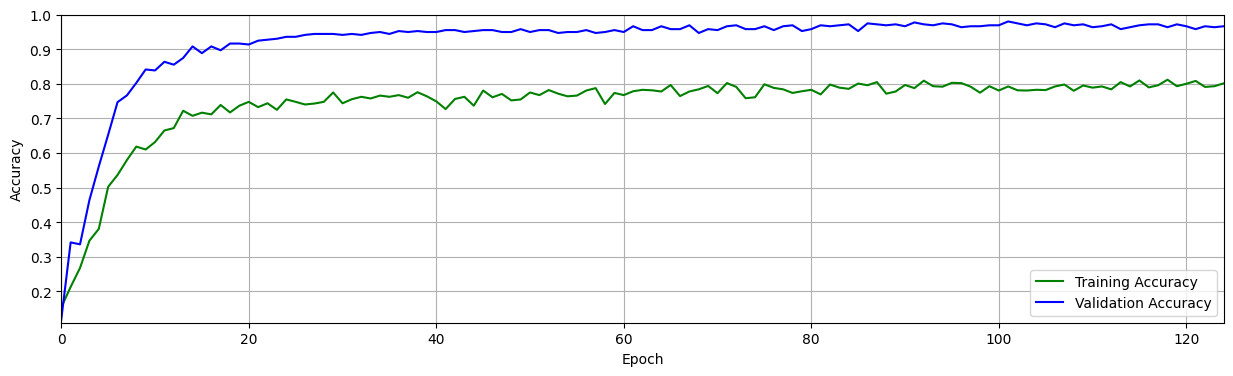

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report:

Additional Metrics:
MCC: 0.9631



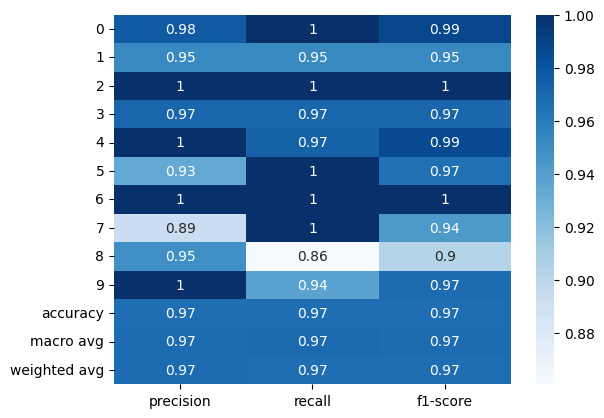

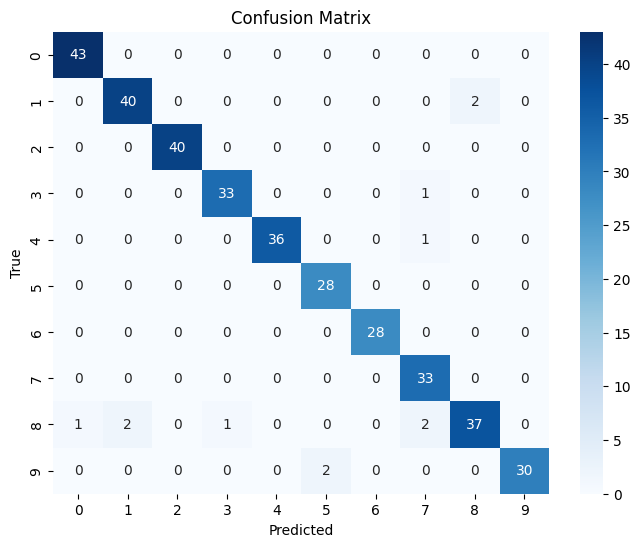

In [ ]:
model = Sequential()
initializer = GlorotNormal()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initializer))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax', kernel_initializer=initializer))
model.add(Dropout(0.2))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

learn(model, X, y, 125, 1, 32)

In [ ]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2), padding='same'),
    Dropout(0.25),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2), padding='same'),
    Dropout(0.35),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.001, weight_decay=1e-5)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

learn(model, X, y, 125, 1, 32)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_46" is incompatible with the layer: expected axis -1 of input shape to have value 1152, but received input with shape (None, 32)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 8, 8, 1), dtype=float32)
  • training=True
  • mask=None

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1236 - loss: 2.6831 - val_accuracy: 0.1736 - val_loss: 2.5879
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1523 - loss: 2.5562 - val_accuracy: 0.1713 - val_loss: 2.4922
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2741 - loss: 2.4639 - val_accuracy: 0.3032 - val_loss: 2.4139
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3885 - loss: 2.3833 - val_accuracy: 0.3634 - val_loss: 2.3206
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4358 - loss: 2.2729 - val_accuracy: 0.3634 - val_loss: 2.1499
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4345 - loss: 2.0800 - val_accuracy: 0.4259 - val_loss: 1.9027
Epoch 7/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4647 - loss: 1.8448 - val_accuracy: 0.5093 - val_loss: 1.7043
Epoch 8/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5876 - loss: 1.6536 - val_accuracy: 0.6111 - val_loss: 1.5189
Epoch 9/9

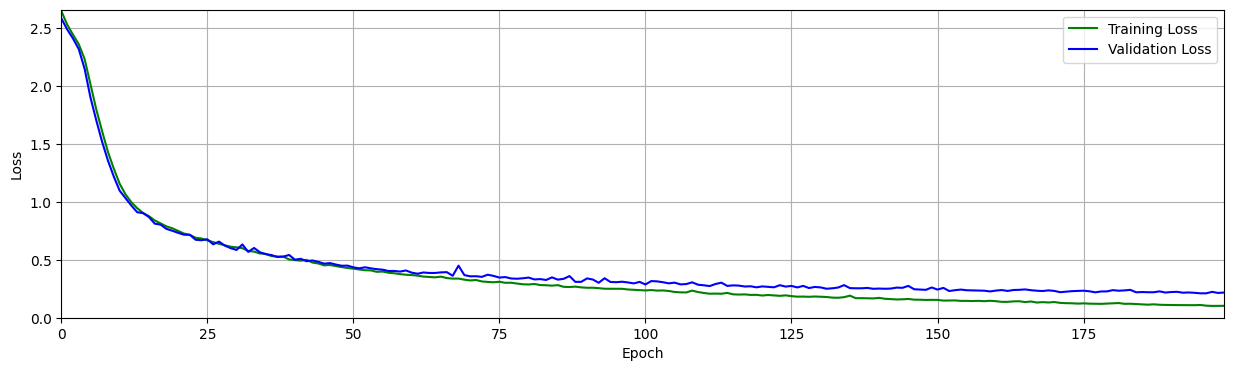

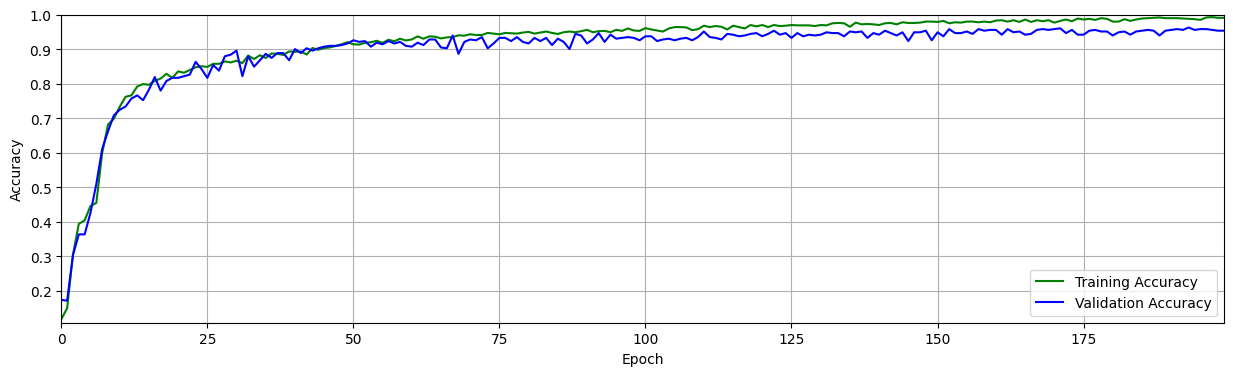

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report:

Additional Metrics:
MCC: 0.9662



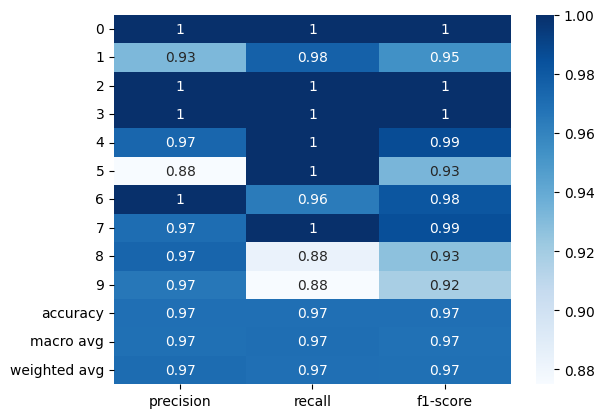

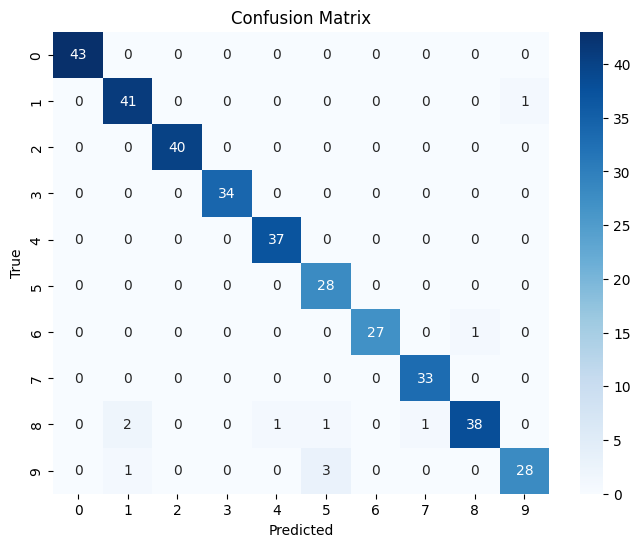

In [ ]:
model = Sequential()
initializer = GlorotNormal()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1), kernel_initializer=initializer))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initializer))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_initializer=initializer, kernel_regularizer='l2'))

model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

learn(model, X, y, 200, 1, 32)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1147 - loss: 2.6962 - val_accuracy: 0.3403 - val_loss: 2.5897
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2413 - loss: 2.5568 - val_accuracy: 0.3981 - val_loss: 2.4831
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3058 - loss: 2.4550 - val_accuracy: 0.3287 - val_loss: 2.3991
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3318 - loss: 2.3673 - val_accuracy: 0.3171 - val_loss: 2.3076
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3641 - loss: 2.2527 - val_accuracy: 0.4120 - val_loss: 2.1382
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3883 - loss: 2.0845 - val_accuracy: 0.4097 - val_loss: 1.8964
Epoch 7/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4272 - loss: 1.8461 - val_accuracy: 0.4352 - val_loss: 1.6885
Epoch 8/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4794 - loss: 1.6434 - val_accuracy: 0.5949 - val_loss: 1.5019
Epoch 9/9

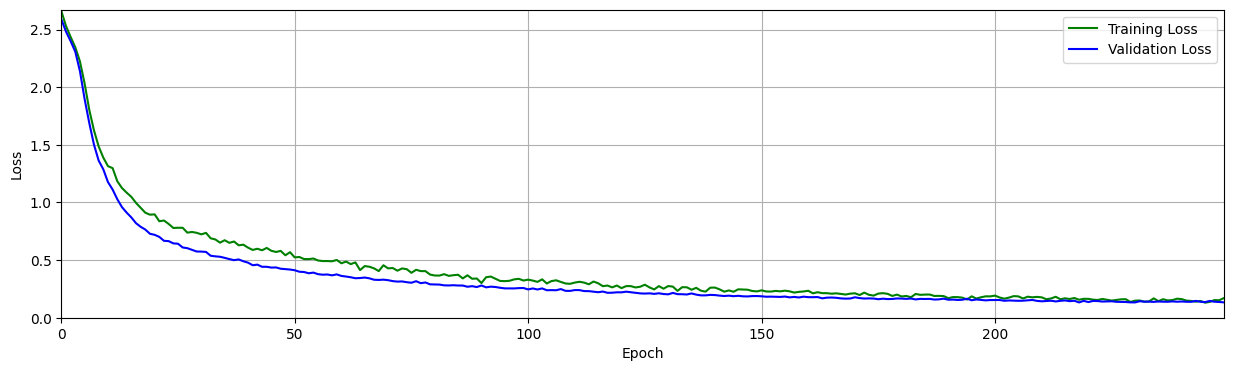

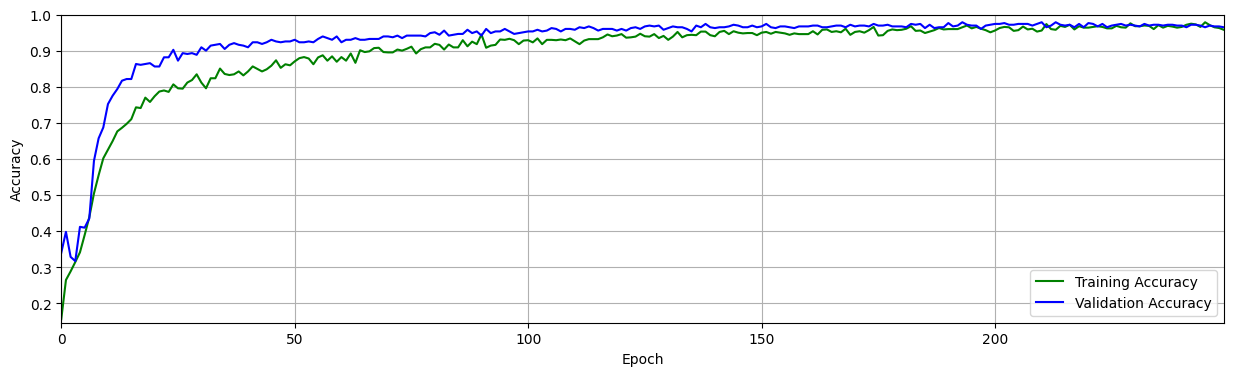

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Classification Report:

Additional Metrics:
MCC: 0.9693



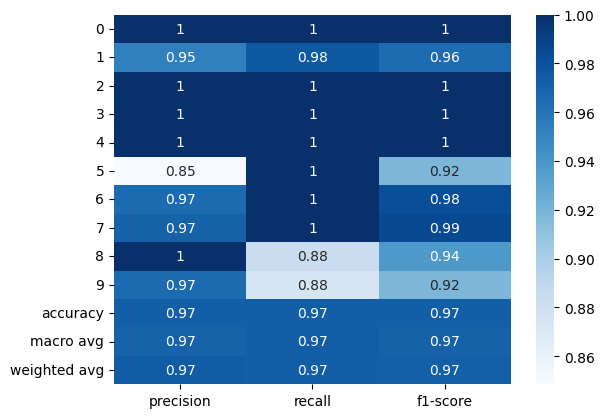

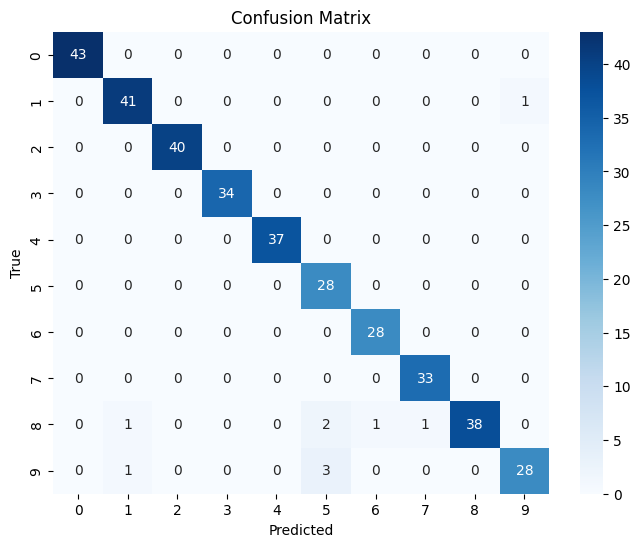

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_regularizer='l2'))

model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

learn(model, X, y, 250, 1, 32)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1452 - loss: 2.6870 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0903 - val_loss: 2.5824 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1156 - loss: 2.5524 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0880 - val_loss: 2.4781 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1552 - loss: 2.4530 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1505 - val_loss: 2.3989 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1952 - loss: 2.3764 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1667 - val_loss: 2.3135 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2087 - loss: 2.2750 - precision: 0.0000e+00 - recall: 

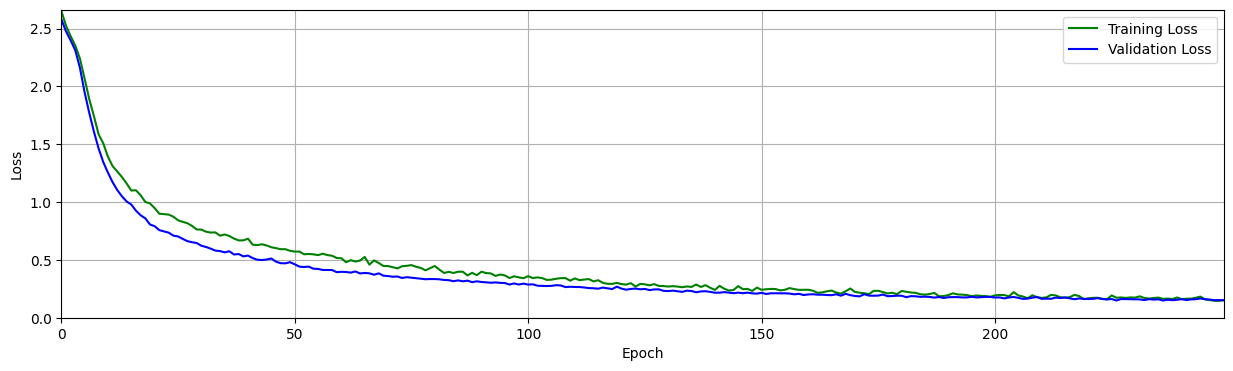

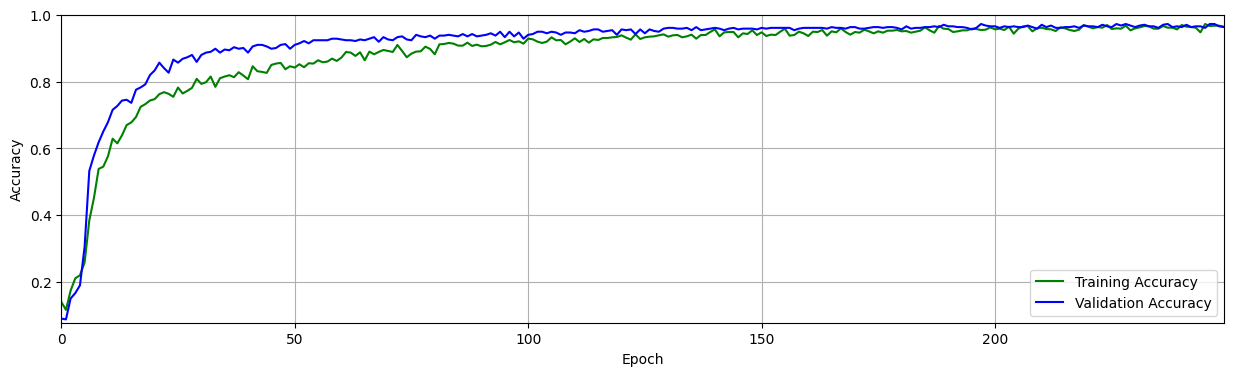

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report:

Additional Metrics:
MCC: 0.9722



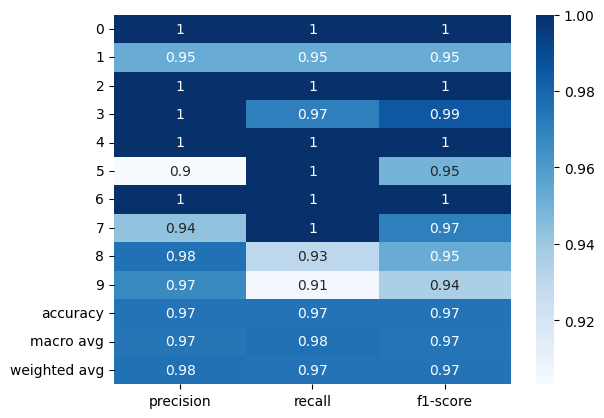

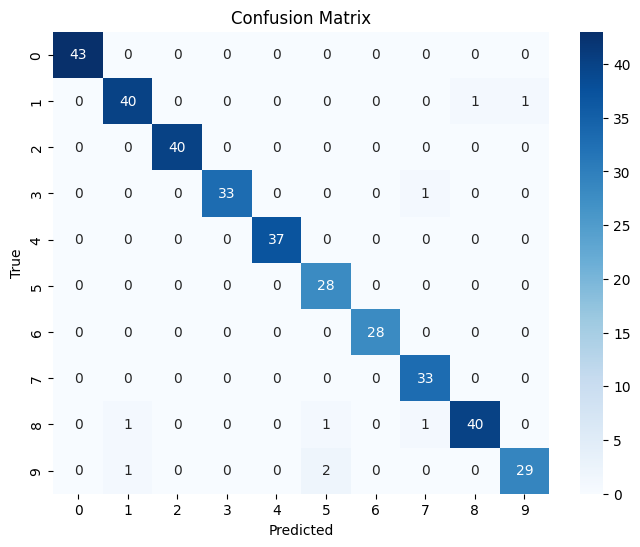

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_regularizer='l2'))

model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

learn(model, X, y, 250, 1, 32)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.1109 - loss: 4.6653 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1528 - val_loss: 4.2126 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1538 - loss: 4.0724 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1713 - val_loss: 3.6867 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2764 - loss: 3.5633 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2639 - val_loss: 3.2443 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2522 - loss: 3.1419 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2222 - val_loss: 2.8848 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2613 - loss: 2.7961 - precision: 0.0000e+00 - recall: 

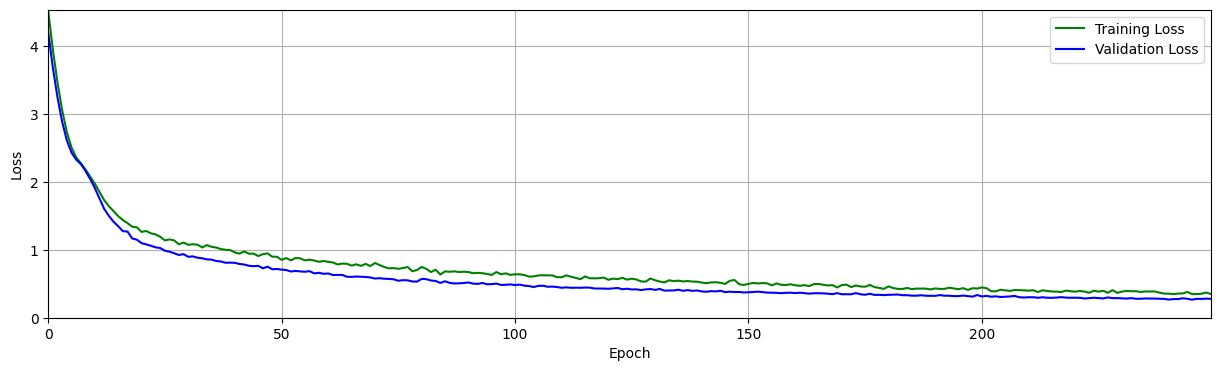

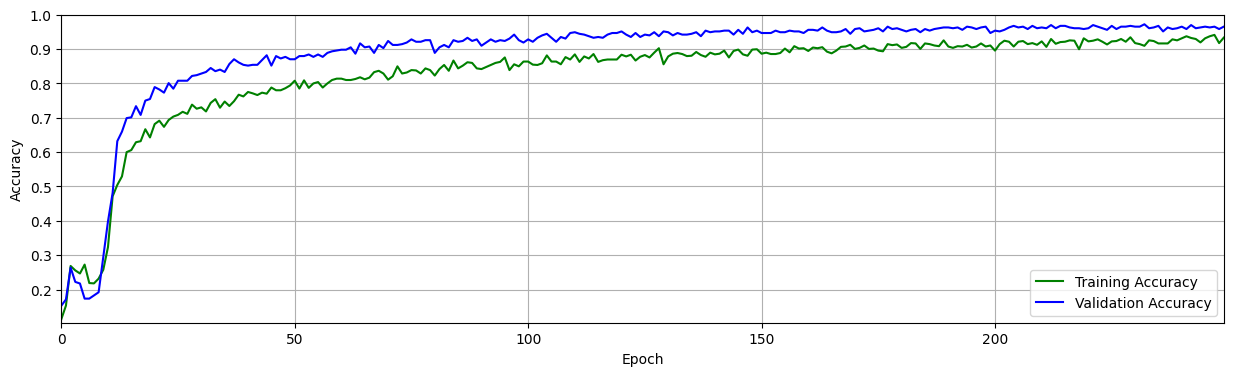

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report:

Additional Metrics:
MCC: 0.9569



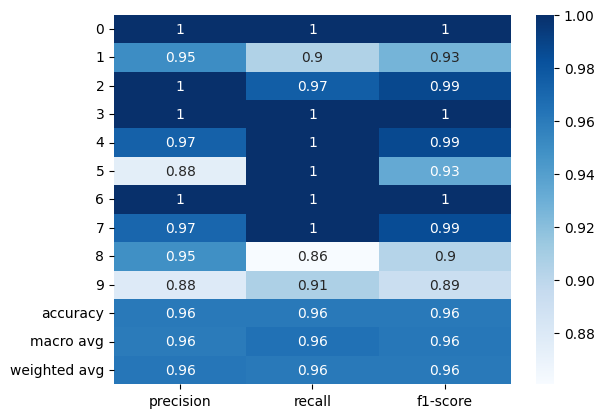

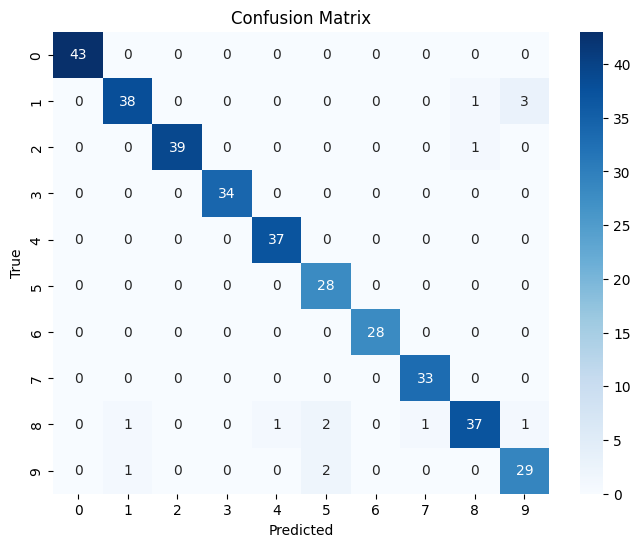

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_regularizer='l1'))

model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall'],
)

learn(model, X, y, 250, 1, 32)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.1553 - loss: 3.1702 - val_accuracy: 0.1088 - val_loss: 2.7111
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4956 - loss: 1.8935 - val_accuracy: 0.1088 - val_loss: 2.6946
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6424 - loss: 1.4626 - val_accuracy: 0.1088 - val_loss: 2.6833
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7617 - loss: 1.1798 - val_accuracy: 0.1250 - val_loss: 2.6715
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8391 - loss: 0.9299 - val_accuracy: 0.1157 - val_loss: 2.6646
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8308 - loss: 0.8671 - val_accuracy: 0.0741 - val_loss: 2.6577
Epoch 7/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8797 - loss: 0.7161 - val_accuracy: 0.2222 - val_loss: 2.6440
Epoch 8/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8802 - loss: 0.6975 - val_accuracy: 0.2292 - val_loss: 2.6271
Epoc

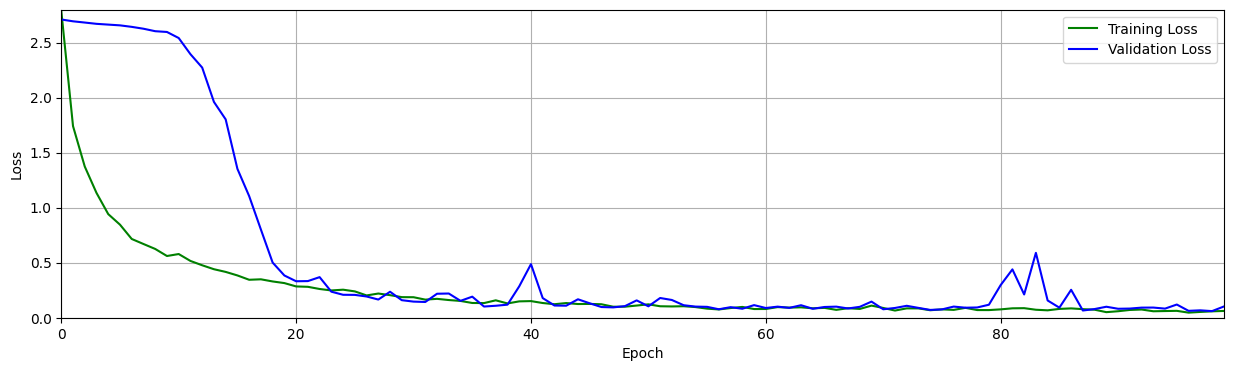

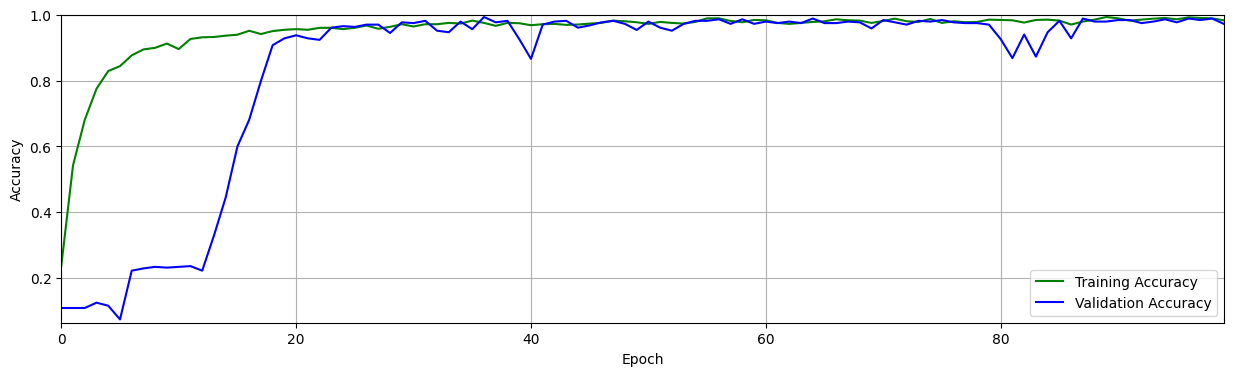

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Classification Report:

Additional Metrics:
MCC: 0.9877



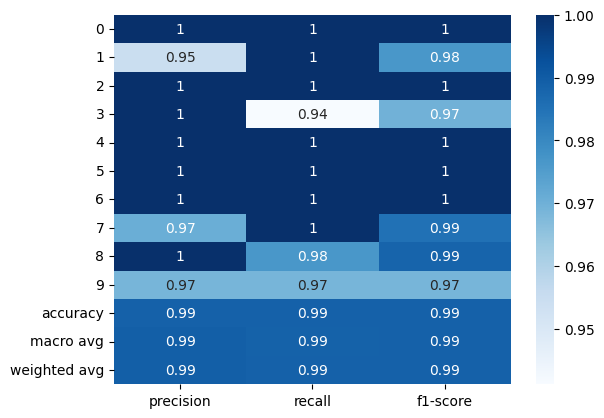

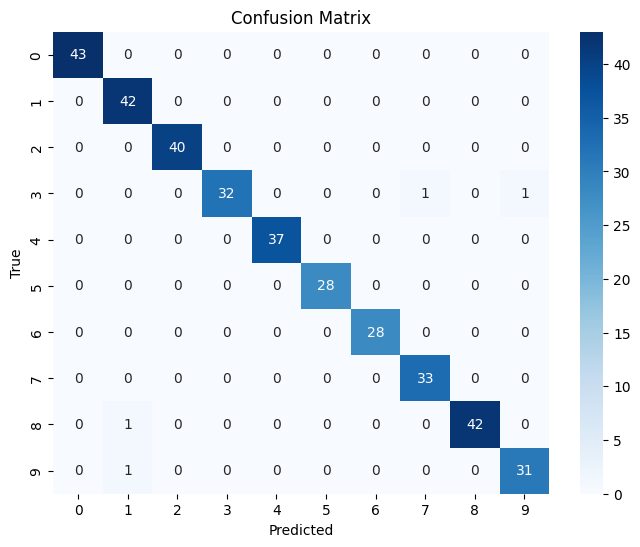

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

learn(model, X, y, 100, 1, 32)

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.1938 - loss: 3.0773 - val_accuracy: 0.0856 - val_loss: 2.7375
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4561 - loss: 1.9410 - val_accuracy: 0.1667 - val_loss: 2.7374
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6435 - loss: 1.5524 - val_accuracy: 0.1157 - val_loss: 2.7282
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7022 - loss: 1.2992 - val_accuracy: 0.1088 - val_loss: 2.7188
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7651 - loss: 1.1068 - val_accuracy: 0.1088 - val_loss: 2.7054
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7932 - loss: 0.9878 - val_accuracy: 0.1088 - val_loss: 2.6828
Epoch 7/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8329 - loss: 0.8417 - val_accuracy: 0.1134 - val_loss: 2.6361
Epoch 8/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8506 - loss: 0.8281 - val_accuracy: 0.1458 - val_loss: 2.5917
Epoch

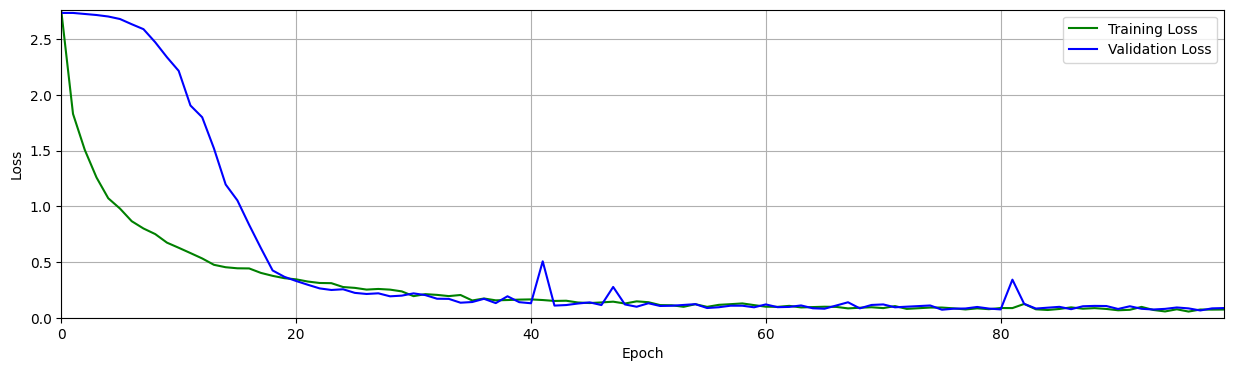

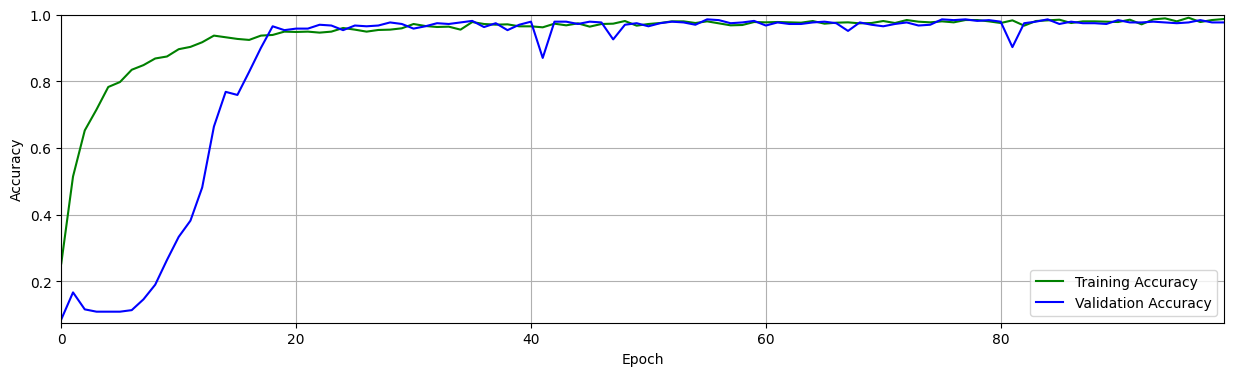

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report:

Additional Metrics:
MCC: 0.9877



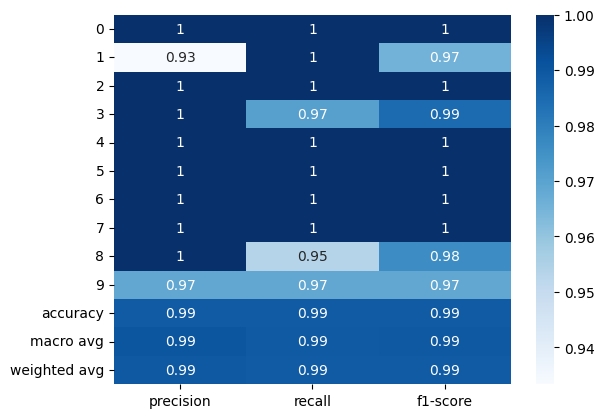

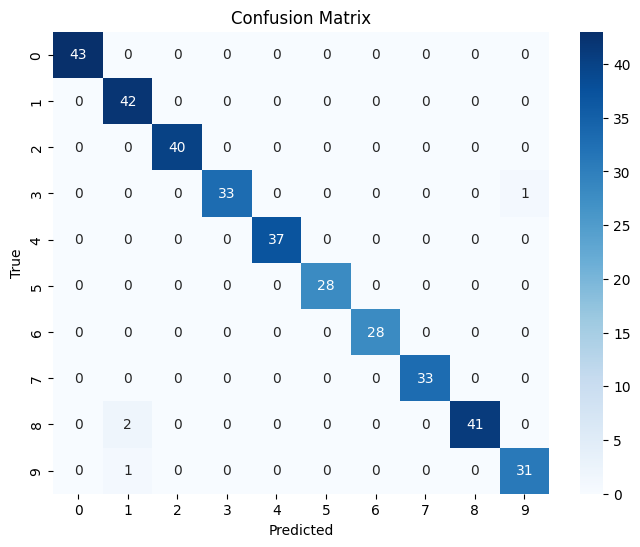

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

learn(model, X, y, 100, 1, 32)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2442 - loss: 2.7100 - val_accuracy: 0.1829 - val_loss: 2.6953
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5230 - loss: 1.8191 - val_accuracy: 0.1065 - val_loss: 2.6772
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6520 - loss: 1.4883 - val_accuracy: 0.1620 - val_loss: 2.6619
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7271 - loss: 1.2331 - val_accuracy: 0.0741 - val_loss: 2.6426
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7485 - loss: 1.0776 - val_accuracy: 0.1412 - val_loss: 2.6112
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8305 - loss: 0.8876 - val_accuracy: 0.2616 - val_loss: 2.5764
Epoch 7/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8636 - loss: 0.8367 - val_accuracy: 0.2431 - val_loss: 2.5286
Epoch 8/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8709 - loss: 0.7431 - val_accuracy: 0.2199 - val_loss: 2.4677
Epoch 9/9

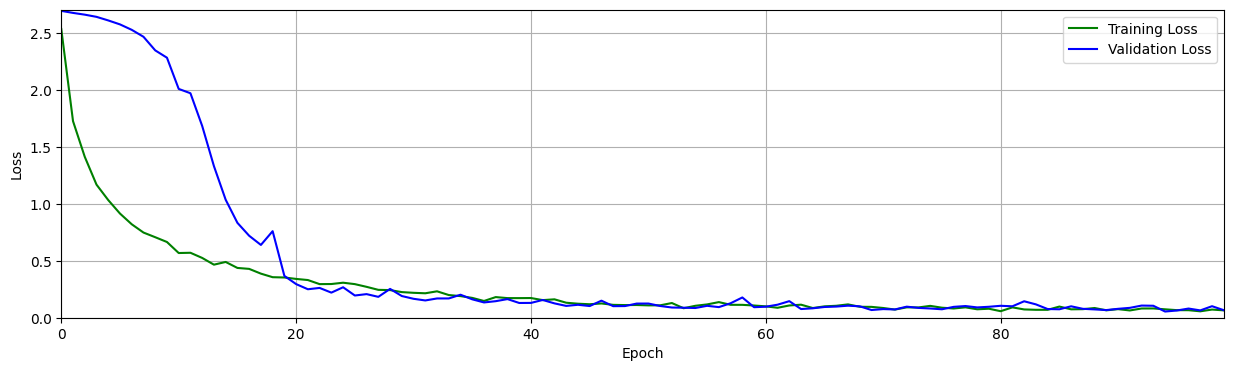

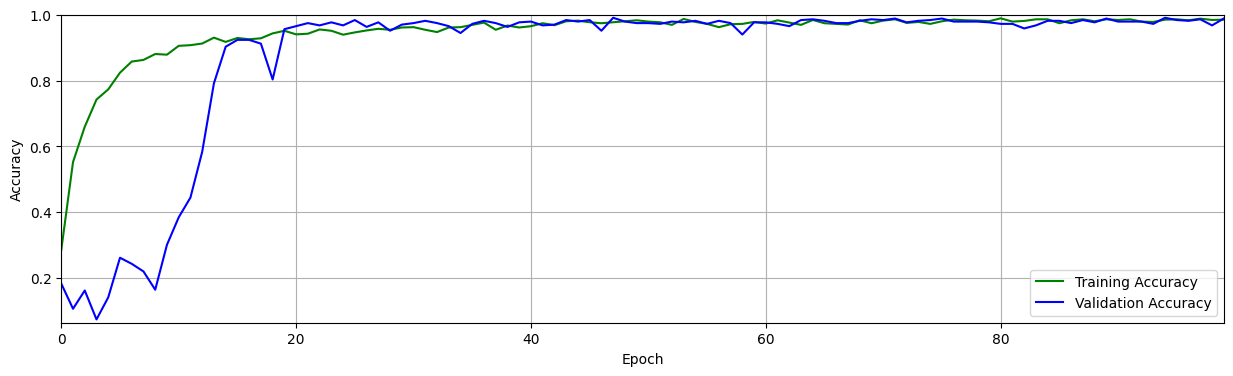

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report:

Additional Metrics:
MCC: 0.9815



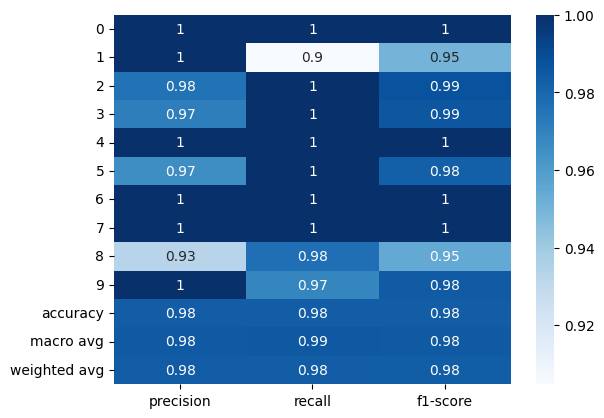

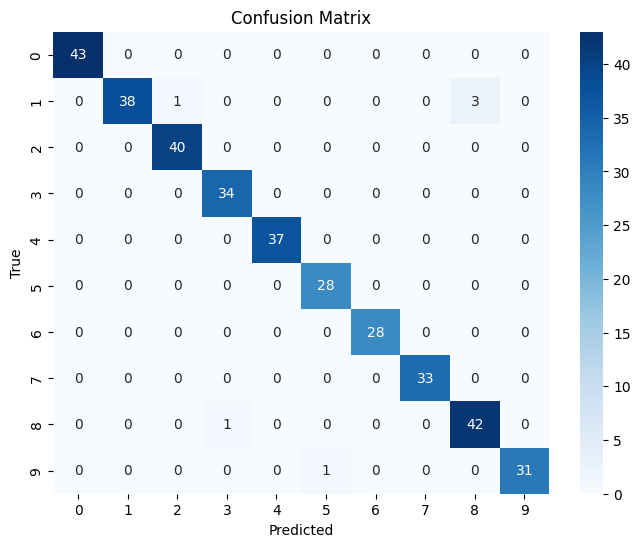

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

learn(model, X, y, 100, 1, 32)

In [ ]:
def learn(model, X, y, max_epochs, epochs_per_iter, batch_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    train_loss = []
    train_acc  = []
    valid_loss = []
    valid_acc  = []

    epoch = 0
    while epoch < max_epochs:
        training_results = model.fit(X_train, y_train, batch_size=batch_size, initial_epoch=epoch, epochs=epoch+epochs_per_iter, verbose=1, validation_split=0.2)

        if math.isnan(training_results.history["loss"][-1]):
            break

        train_loss.extend(training_results.history["loss"])
        train_acc.extend(training_results.history["accuracy"])
        valid_loss.extend(training_results.history["val_loss"])
        valid_acc.extend(training_results.history["val_accuracy"])

        epoch += epochs_per_iter

    plot_results([ train_loss, valid_loss ],
                ylabel="Loss",
                xlim = [0, max_epochs-1],
                ylim = [0.0, max(max(train_loss), max(valid_loss))+0.01],
                metric_name=["Training Loss", "Validation Loss"],
                color=["g", "b"])

    plot_results([ train_acc, valid_acc ],
                ylabel="Accuracy",
                xlim = [0, max_epochs-1],
                ylim = [min(min(train_acc), min(valid_acc))-0.01, 1.0],
                metric_name=["Training Accuracy", "Validation Accuracy"],
                color=["g", "b"])

    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    clf_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='Blues')
    print("\nAdditional Metrics:")
    mcc = matthews_corrcoef(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    print(f"MCC: {mcc:.4f}\n")

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 63s 16ms/step - accuracy: 0.1746 - loss: 3.1106 - val_accuracy: 0.1076 - val_loss: 2.7102
Epoch 2/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4876 - loss: 1.9548 - val_accuracy: 0.2083 - val_loss: 2.6914
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6881 - loss: 1.3553 - val_accuracy: 0.1875 - val_loss: 2.6866
Epoch 4/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7380 - loss: 1.2222 - val_accuracy: 0.1146 - val_loss: 2.6758
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7821 - loss: 1.0389 - val_accuracy: 0.1111 - val_loss: 2.6646
Epoch 6/6
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8405 - loss: 0.8633 - val_accuracy: 0.1979 - val_loss: 2.6572
Epoch 7/7
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8616 - loss: 0.8033 - val_accuracy: 0.2153 - val_loss: 2.6227
Epoch 8/8
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8946 - loss: 0.6811 - val_accuracy: 0.1771 - val_loss: 2.5509
Epoch 9/

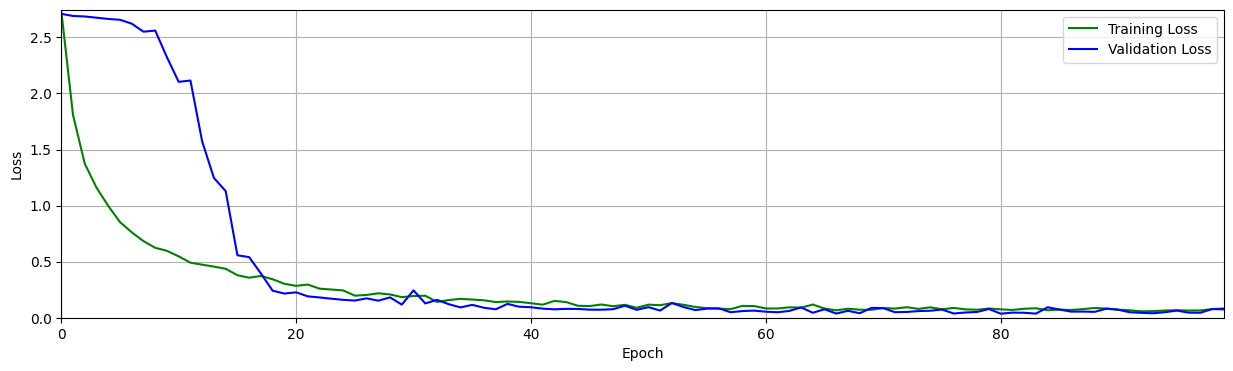

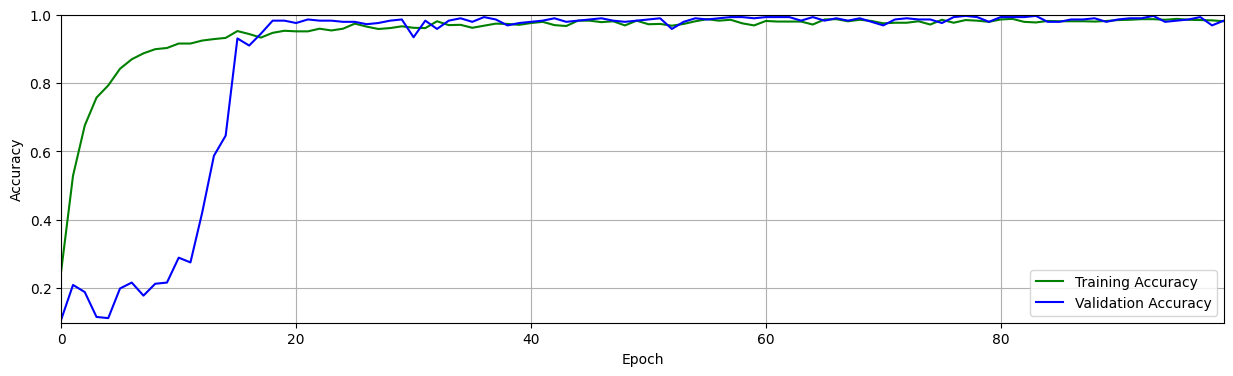

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report:

Additional Metrics:
MCC: 0.9877



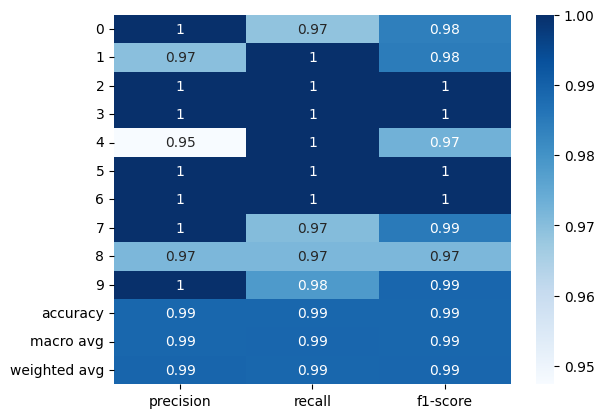

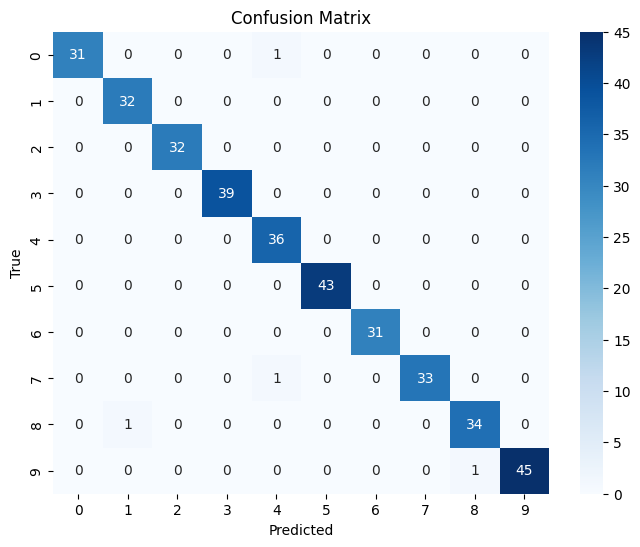

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

learn(model, X, y, 100, 1, 32)

36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1497 - loss: 3.2761 - val_accuracy: 0.1007 - val_loss: 2.9284
Epoch 2/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2754 - loss: 2.6551 - val_accuracy: 0.1181 - val_loss: 2.9129
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4035 - loss: 2.3005 - val_accuracy: 0.2743 - val_loss: 2.8895
Epoch 4/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5129 - loss: 2.0391 - val_accuracy: 0.2083 - val_loss: 2.8623
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5915 - loss: 1.7926 - val_accuracy: 0.1215 - val_loss: 2.8308
Epoch 6/6
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6776 - loss: 1.5747 - val_accuracy: 0.1215 - val_loss: 2.7920
Epoch 7/7
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7026 - loss: 1.4584 - val_accuracy: 0.1215 - val_loss: 2.7434
Epoch 8/8
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7419 - loss: 1.3429 - val_accuracy: 0.1250 - val_loss: 2.6705
Epoch 

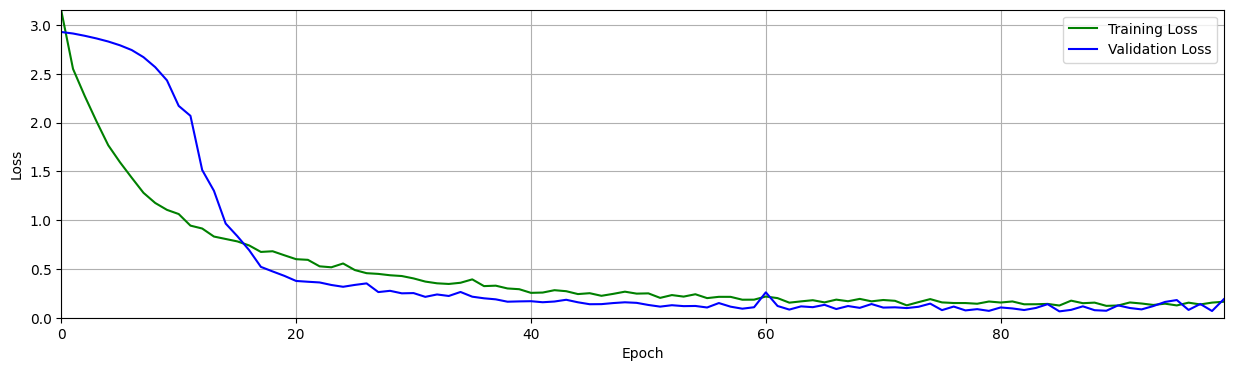

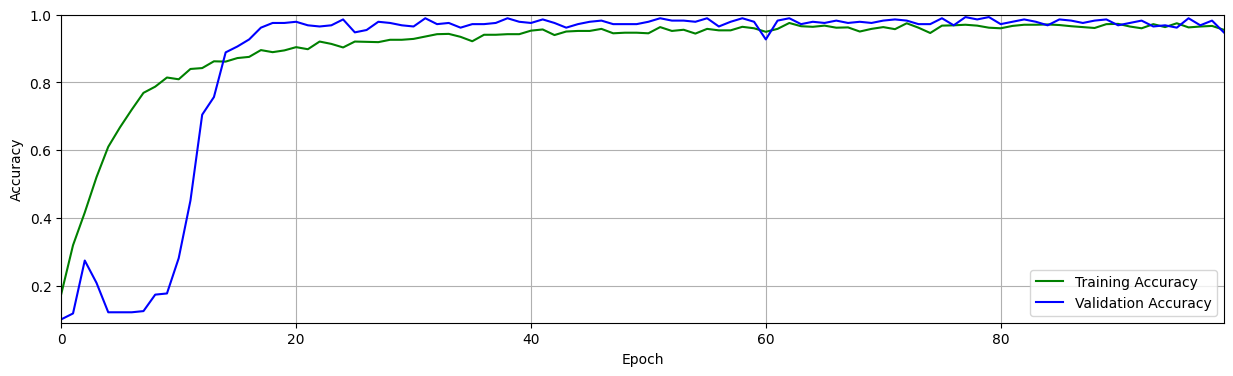

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Classification Report:

Additional Metrics:
MCC: 0.9665



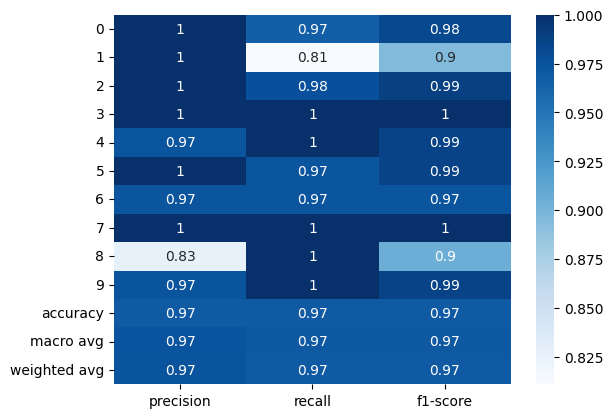

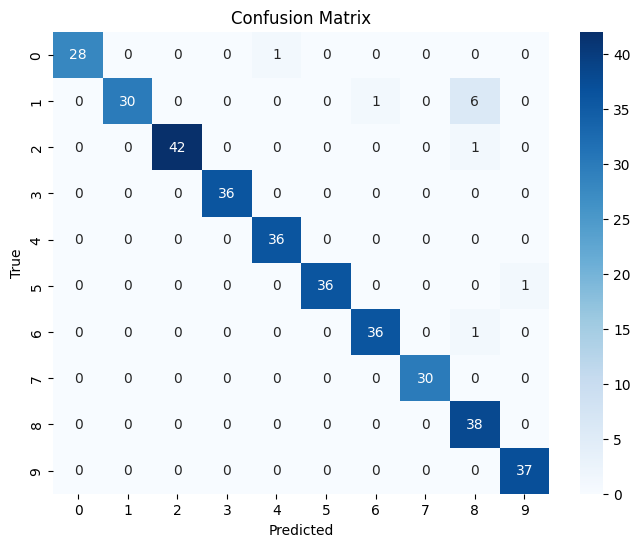

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

learn(model, X, y, 100, 1, 32)

36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1289 - loss: 3.5011 - val_accuracy: 0.1042 - val_loss: 2.9408
Epoch 2/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2596 - loss: 2.7508 - val_accuracy: 0.1042 - val_loss: 2.9317
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4392 - loss: 2.2792 - val_accuracy: 0.1042 - val_loss: 2.9262
Epoch 4/4
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5094 - loss: 2.0046 - val_accuracy: 0.1424 - val_loss: 2.9367
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5890 - loss: 1.8435 - val_accuracy: 0.1076 - val_loss: 2.9616
Epoch 6/6
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6790 - loss: 1.6200 - val_accuracy: 0.1076 - val_loss: 2.9827
Epoch 7/7
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7376 - loss: 1.4210 - val_accuracy: 0.1076 - val_loss: 3.0184
Epoch 8/8
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7576 - loss: 1.3063 - val_accuracy: 0.1076 - val_loss: 2.9924
Epoch

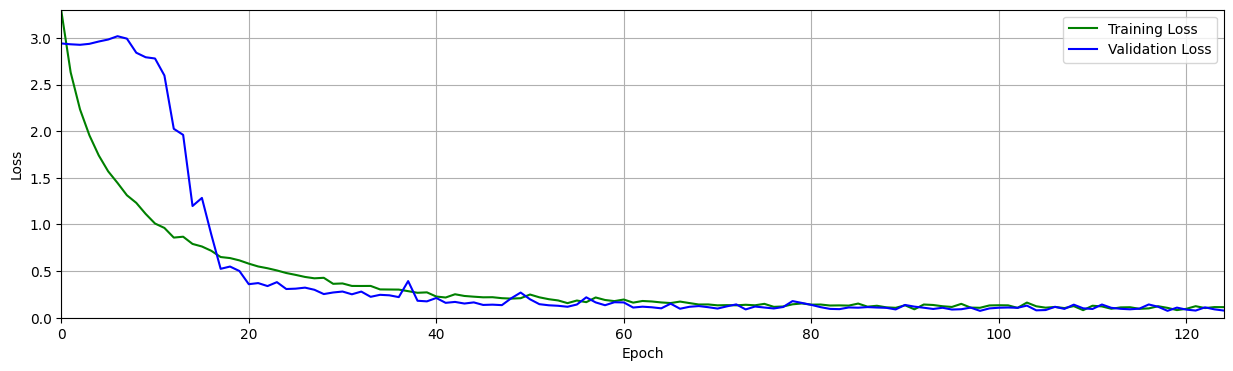

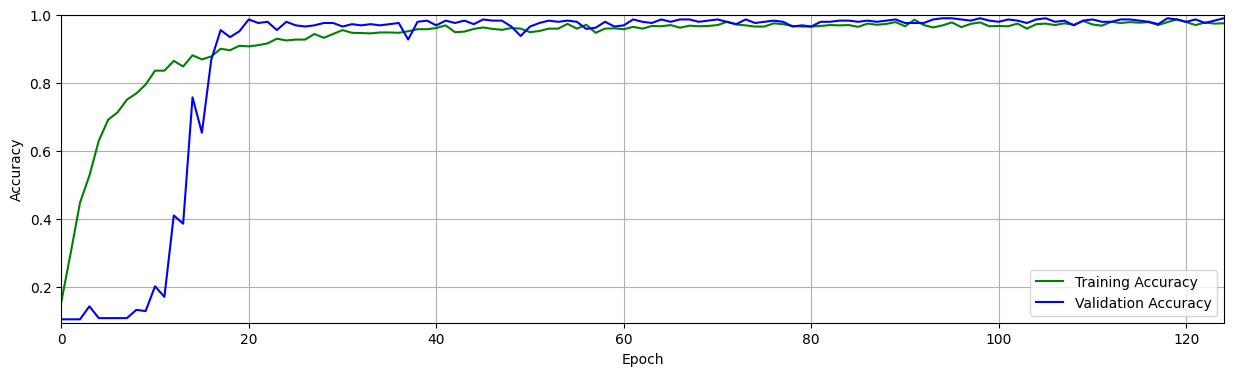

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Classification Report:

Additional Metrics:
MCC: 0.9877



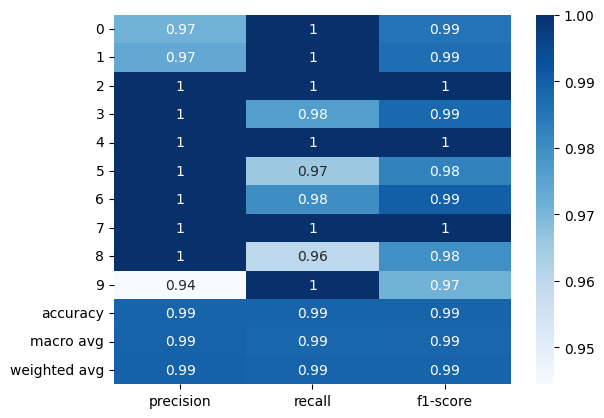

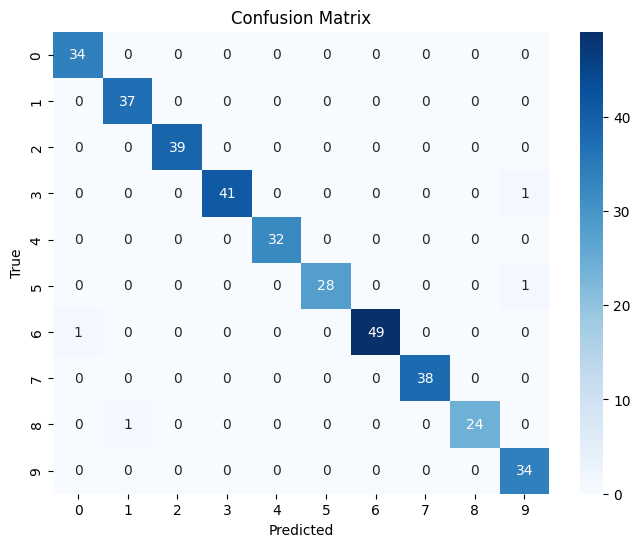

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

learn(model, X, y, 125, 1, 32)